# Scratch Detection Assignment
Scratch Detection Assignment for a student position in the data science team at NI

<img src="assets/NI_logo.png" width="100" height="100">
Before you start working on this assignment, make sure you meet the prerequisites below: <a href="https://hdjq.fa.us2.oraclecloud.com/hcmUI/CandidateExperience/en/sites/CX_1/job/25017214">Machine Learning Engineer Student Job Description</a>

**Main mandatory requirements:**

- Studying for M.Sc/B.Sc in Computer Science or related technical discipline( M.Sc is a big advantage)
- Remaining studies of at least one and a half years.
- Availability for 3-4 working days a week.

## Introduction:

In the semiconductor industry, **"wafers"** are thin discs of semiconductor material, such as silicon, used to fabricate microelectronic devices such as transistors, integrated circuits, and other components. A single wafer can contain hundreds or thousands of individual devices, known as **"dies"**, which are typically cut or "diced" from the wafer after the manufacturing process is completed.

You can read more about semiconductor here: <a href="https://web.archive.org/web/20230115132446/https://www.amd.com/en/technologies/introduction-to-semiconductors//">Introduction to Semiconductors</a>

<figure>
  <img src="assets/wafer.jpeg" width="350" height="280">
  <figcaption>Fig.1 - An example of a standard wafer</figcaption>
</figure>

One of the challenges in manufacturing wafers is to identify and isolate defects, including scratches, which can affect the performance and reliability of the resulting devices.

Scratches are seen as elongated clusters of bad dies that have a high aspect ratio, meaning they are relatively thin and long compared to their width. They can be caused by equipment misalignment or mishandling by humans, and may contain latent defects that can affect the performance of the devices. Scratches may not always be continuous, so sometimes there may be good dies within the scratch. These good dies are often marked for removal in a manual process called "**Inked dies**"

<figure>
  <img src="assets/scratch.png">
  <figcaption>Fig.2 - A scratch on a wafer - an optical view</figcaption>
</figure>

In the data that you receive, there may be faulty dies that are part of a scratch, which are labeled as "Scratch" as well as a few good dies that are part of a scratch, which are labeled as "Ink."

Many times, the Scratch Detection process will be done on the logical wafer map and not on a visual image of it.

The data that you received is called **"wafer map"** as it maps the status of all dies in the wafer.

The dies in the wafers are tested in a large number of stations, operations, and in each operation it is possible to create a map of the dies in this operation by coloring the good dies in a certain color and the faulty dies in another color.

<figure>
  <img src="assets/wafer_map.png" width="300" height="300">
  <figcaption>Fig.3 - A logical wafer map in a certain operation. good dies in green and bad dies in red</figcaption>
</figure>

Did you notice a scratch on this wafer?

Well, with our eyes it is easy to notice the scratch that comes out from the right side in the center of the wafer.

Note, that this scratch is not continuous, meaning, not all the dies which are placed on this scratch are considered faults in this operation. We have to identify all scracthed dies including bad & good. The good dies that are part of the scartch have to be itendified actively in order to be killed. This process is called "inking".

We kill them because we fear that a physical scratch on the silicon wafer is what caused the sequence of these faulty dies, therefore even dies that passed the tests may be of low quality because they were damaged by the scratch on which they are placed.

<figure>
  <img src="assets/wafer_map_with_marks.png" width="300" height="300">
  <figcaption>Fig.4 - A wafer map in a certain operation with scratch detection marks. good dies in grenn, bad dies in red, scratch in blue, ink in yellow</figcaption>
</figure>

You can read more about the causes of die failures here: <a href="https://semiengineering.com/why-chips-die//">Why Chips Die</a>

## Assignment description

In this assignment you are receiving wafer maps in a certain operation and the goal is to predict whether a given die belongs to scratch or not.

The data includes information about individual dies from a number of wafers.

The table data includes the following columns:

-  `WaferName` : The name of the wafer from which the die came.
- `DieX`: The horizontal position of the die on the wafer.
- `DieY`: The vertical position of the die on the wafer.
- `IsGoodDie`: A binary column indicating whether the die is good or not.
- `IsScratchDie`: A binary column indicating whether the die belongs to a scratch or not.

Your goal is to use the training data to build a model that can predict, given a certain wafer map, the dies on the map that are parts of a scratch (whether they are bad, 'Scratch' or good, 'Ink').

*The purpose of the assignment is mainly to get to reasonable solution that can help the business. Please note that real industry solutions usually achieve lower scores than you may be used from academic problems so even a low metric score on the test set may be considered a success*

Business goals:

- **Automation**. This process is currently a manual and expensive procedure that takes a lot of time and is prone to errors by the tagger. The goal is to perform this procedure in a faster time and save the costs of the test
- **Quality**. increasing the quality of the dies while balancing quality and yield (on the one hand, not to miss scratches, on the other hand not to do too much "Ink")
- **Prediction Level**. As explained above, the main goal is to detect individual dies, but sometimes it will help to also get a classification at the wafer level, (binary classification, is there a scratch on this wafer or not?) because there are manufacturers who return scratched wafers to the factory.

**Note**. In wafers with a low yield (that is, a lot of faulty dies), we will **not** perform scratch detection because the customer is afraid to find randomly generated scratches there and perform unnecessary ink. In such cases, the customer will make sure to check all the dies strictly in any case, but regardless of the detection of scratches. Therefore, in these cases we will not consider a sequence of bad die to be scratch.

You are free to use any machine learning technique you find appropiate for solving this problem. Make sure choosing the relevamt metrics to test your solutions's performance.

In addition to the training data, you are given a test set, which includes the x and y coordinates and the good/not status of each die, but does not include the scratch/not scratch labels.

You are asked to use your model to predict the scratch/not scratch status of the dies in the test set, and to save the predictions in a CSV file. You should submit your notebook including the experiments you did along the way to improve the model/various methods you tried and including your final model.

Pay attention to the following points:

- Exploratoration and analyze the data
- Consideration of business goals
- Selection of relevant machine learning models
- Appropriate choice of metrics

## Submission

1. After completing the assignment please review your notebook, making sure it ran properly from start to finish
2. Create the prediction column for the test set as described in the notebook and save the results to a CVS file
3. Send an email to the following:
    - tomer.zemelman@emerson.com
    - The email should include a zip file with your notebook and a CSV file with the prediction.
4. After receiving the email with the assignment we will inform you about the next steps


Good Luck!

# Start work

In [ ]:
import pandas as pd
import zipfile
from datetime import datetime

C:\Users\wqxb83\AppData\Local\Temp\ipykernel_22840\276388522.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Load Data

In [ ]:
#load zip file
zf = zipfile.ZipFile('data.zip')

In [ ]:
#load train data
df_wafers = pd.read_csv(zf.open('wafers_train.csv'))
df_wafers.head()

,WaferName,DieX,DieY,IsGoodDie,IsScratchDie
0,8PFrAN,0,27,True,False
1,8PFrAN,0,28,True,False
2,8PFrAN,0,29,True,False
3,8PFrAN,0,30,True,False
4,8PFrAN,0,31,True,False


In [ ]:
#load test data
df_wafers_test = pd.read_csv(zf.open('wafers_test.csv'))
df_wafers_test.head()

,WaferName,DieX,DieY,IsGoodDie
0,mZa9ls,0,23,True
1,mZa9ls,0,24,True
2,mZa9ls,0,25,True
3,mZa9ls,0,26,True
4,mZa9ls,0,27,True


You can draw the wafers map to see how the wafers look like in the data.

Using the following helper function you can draw the wafer maps with or without labels:

In [ ]:
def plot_wafer_maps(wafer_df_list, figsize, labels = True):
    """
    plot wafer maps for list of df of wafers

    :param wafer_df_list: list, The list of df's of the wafers
    :param figsize: int, the size of the figsize height
    :param labels: bool, Whether to show the layer of labels (based on column 'IsScratchDie')

    :return: None
    """
    def plot_wafer_map(wafer_df, ax, map_type):
        wafer_size = len(wafer_df)
        s = 2**17/(wafer_size)
        if map_type == 'Label':
            mes = 'Scratch Wafer' if (wafer_df['IsScratchDie'] == True).sum()>0 else 'Non-Scratch Wafer'
        else:
            mes = 'Yield: ' + str(round((wafer_df['IsGoodDie']).sum()/(wafer_df['IsGoodDie']).count(), 2))

        ax.set_title(f'{map_type} | Wafer Name: {wafer_df["WaferName"].iloc[0]}, \nSum: {len(wafer_df)} dies. {mes}', fontsize=20)
        ax.scatter(wafer_df['DieX'], wafer_df['DieY'], color = 'green', marker='s', s = s)

        bad_bins = wafer_df.loc[wafer_df['IsGoodDie'] == False]
        ax.scatter(bad_bins['DieX'], bad_bins['DieY'], color = 'red', marker='s', s = s)

        if map_type == 'Label':
            scratch_bins = wafer_df.loc[(wafer_df['IsScratchDie'] == True) & (wafer_df['IsGoodDie'] == False)]
            ax.scatter(scratch_bins['DieX'], scratch_bins['DieY'], color = 'blue', marker='s', s = s)

            ink_bins = wafer_df.loc[(wafer_df['IsScratchDie'] == True) & (wafer_df['IsGoodDie'] == True)]
            ax.scatter(ink_bins['DieX'], ink_bins['DieY'], color = 'yellow', marker='s', s = s)

            ax.legend(['Good Die', 'Bad Die', 'Scratch Die', 'Ink Die'], fontsize=8)
        else:
            ax.legend(['Good Die', 'Bad Die'], fontsize=8)

        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)

    import numpy as np
    import matplotlib.pyplot as plt

    if labels:
        fig, ax = plt.subplots(2, len(wafer_df_list), figsize=(figsize*len(wafer_df_list), figsize*2))
        for idx1, wafer_df in enumerate(wafer_df_list):
            for idx2, map_type in enumerate(['Input', 'Label']):
                plot_wafer_map(wafer_df, ax[idx2][idx1], map_type)
    else:
        fig, ax = plt.subplots(1, len(wafer_df_list), figsize=(figsize*len(wafer_df_list), figsize))
        for idx, wafer_df in enumerate(wafer_df_list):
            plot_wafer_map(wafer_df, ax[idx], 'Input')

    plt.show()

Select the amount of samples you want to display:

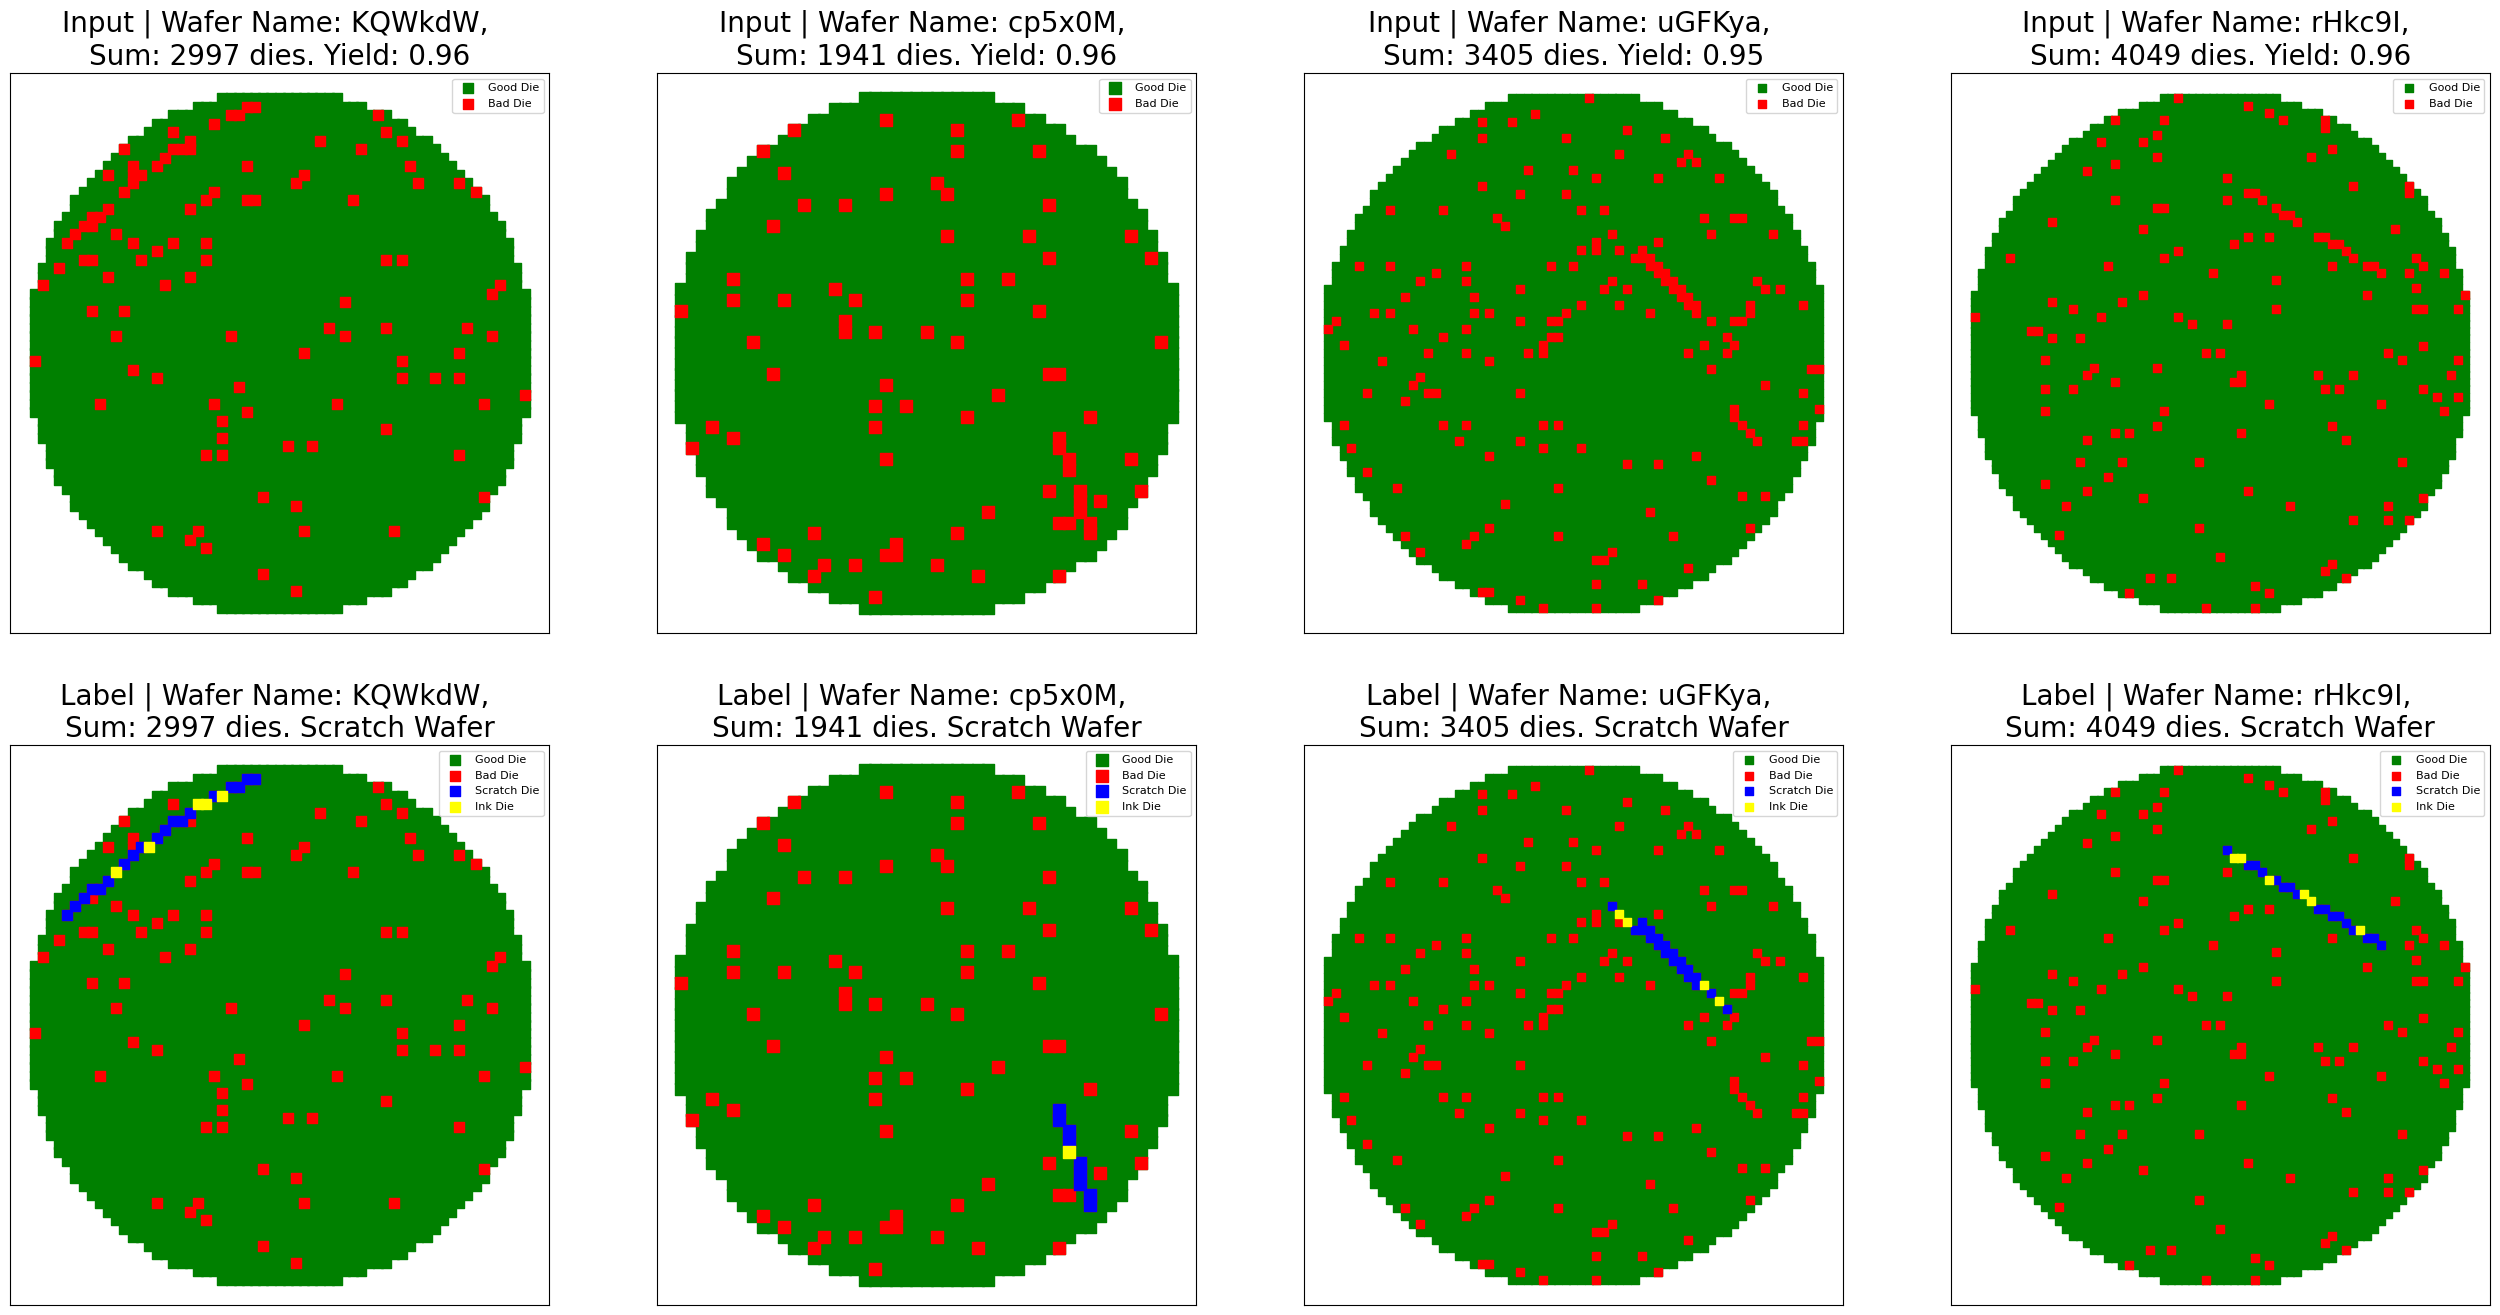

In [ ]:
n_samples = 4
list_sample_train = [df_wafers.groupby('WaferName').get_group(group) for group in df_wafers['WaferName'].value_counts().sample(n_samples, random_state=20).index]
plot_wafer_maps(list_sample_train, figsize = 8, labels = True)

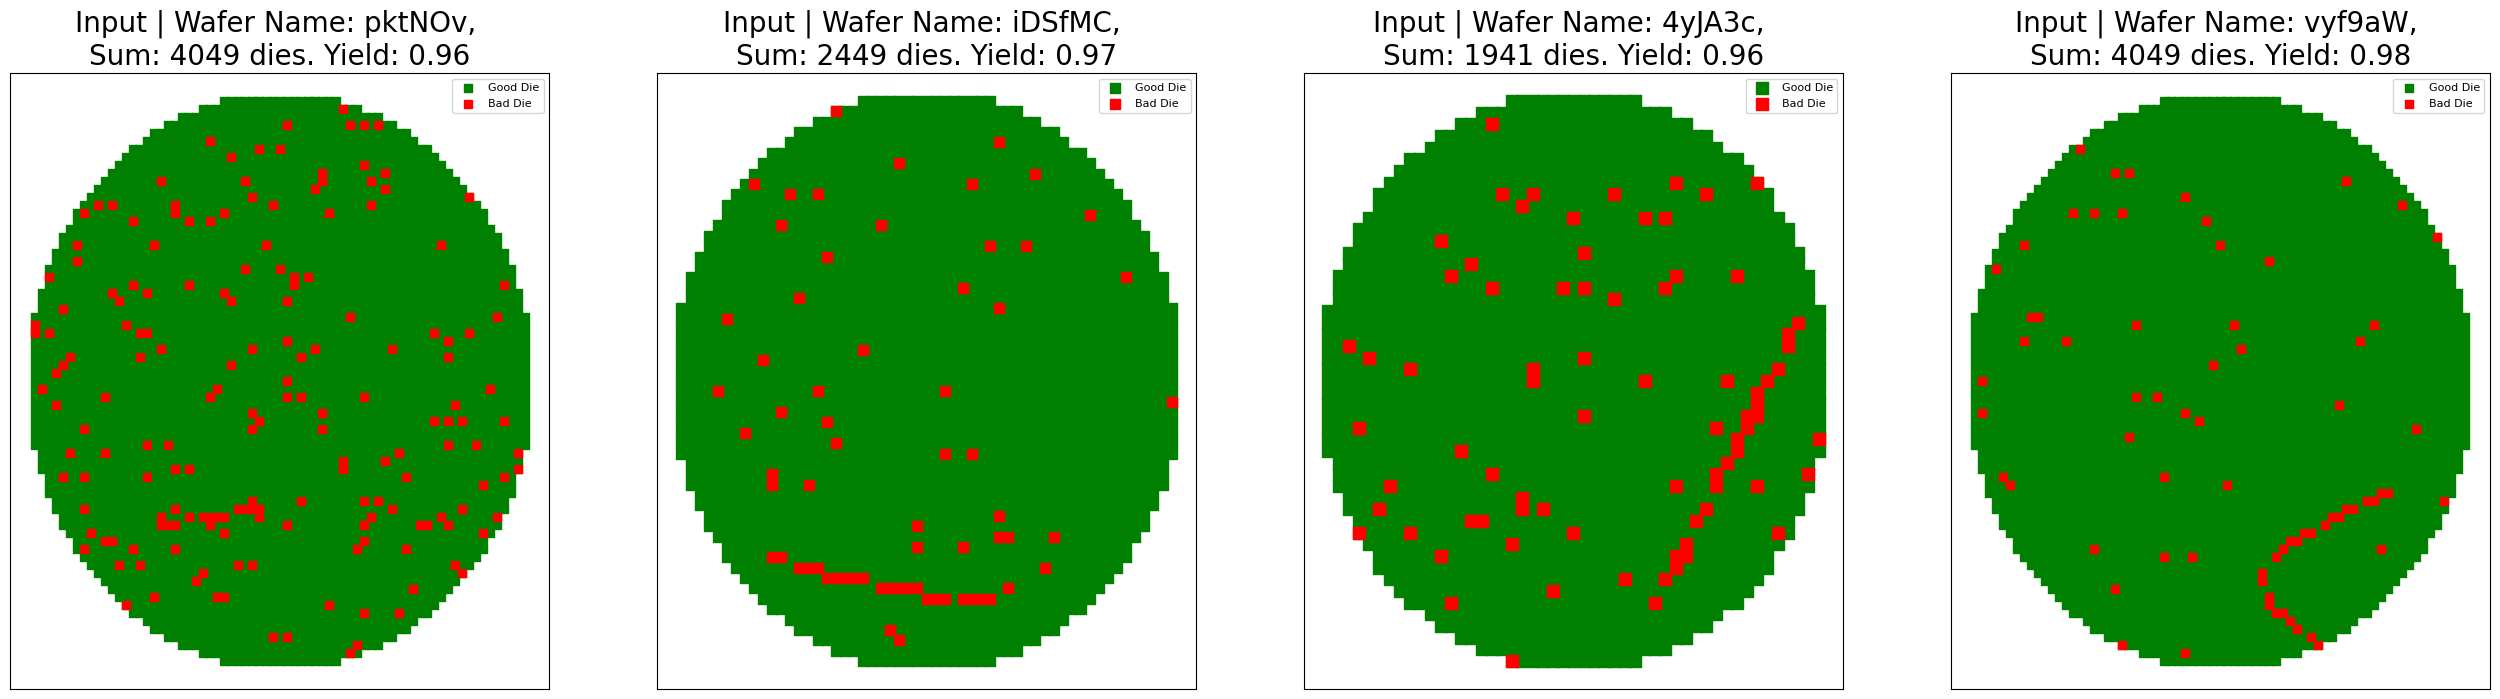

In [ ]:
list_sample_test = [df_wafers_test.groupby('WaferName').get_group(group) for group in df_wafers_test['WaferName'].value_counts().sample(n_samples, random_state=20).index]
plot_wafer_maps(list_sample_test, figsize = 8, labels = False)

# My Solution :

#### Data Understanding - Basic EDA

Total rows: 10415400
Total columns: 5

Data types:
WaferName       object
DieX             int64
DieY             int64
IsGoodDie         bool
IsScratchDie      bool
dtype: object

Missing values:
WaferName       0
DieX            0
DieY            0
IsGoodDie       0
IsScratchDie    0
dtype: int64

Duplicate rows: 0
Number of unique wafers: 2480
Number of dies in each wafer: 4200

Statistical summary (numeric columns):


,DieX,DieY
count,10415400.00,10415400.00
mean,28.93,28.93
std,16.03,16.03
min,0.00,0.00
25%,16.00,16.00
50%,28.00,28.00
75%,41.00,41.00
max,70.00,70.00


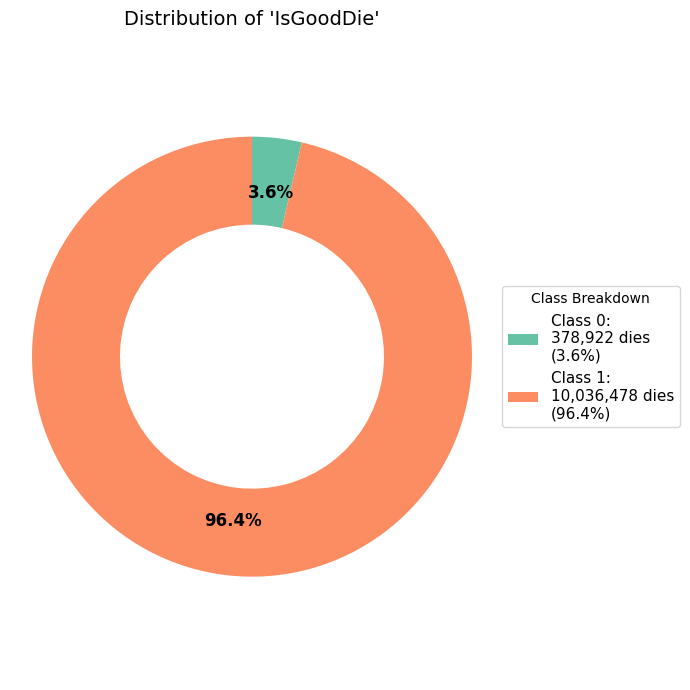

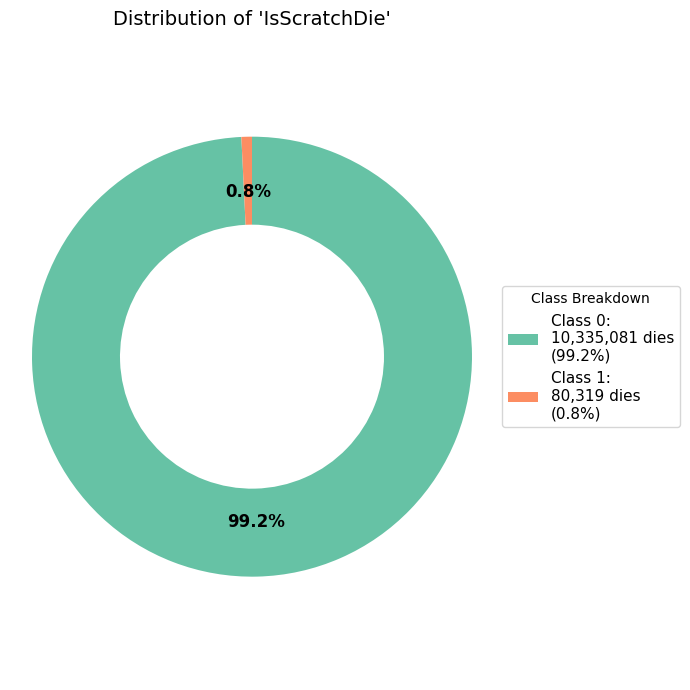

In [ ]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
# Begin with basic EDA to explore the dataset structure, quality, and distributions

# Load training and test sets
train_df = pd.read_csv("wafers_train.csv")
test_df = pd.read_csv("wafers_test.csv")

# Basic EDA: use training set only to avoid data leakage and focus on labeled data

print(f"Total rows: {train_df.shape[0]}")
print(f"Total columns: {train_df.shape[1]}")

# Inspect data types to validate feature formats
print("\nData types:")
print(train_df.dtypes)

# Assess missing data per column
print("\nMissing values:")
print(train_df.isnull().sum())

# Check for duplicate records
print(f"\nDuplicate rows: {train_df.duplicated().sum()}")
print("Number of unique wafers:", math.ceil(train_df.shape[0]/train_df["WaferName"].nunique()))
print("Number of dies in each wafer:", train_df["WaferName"].nunique())
print("\nStatistical summary (numeric columns):")
summary = train_df.describe().round(2)
display(summary)



def plot_boolean_donut(df, column, title=None):
    """
    Displays a donut chart for a binary column with both percent and count,
    formatted cleanly and centered.
    """
    counts = df[column].value_counts().sort_index()
    sizes = counts.values
    labels = [f"{int(val)}" for val in counts.index]
    percentages = [(count / sizes.sum()) * 100 for count in counts.values]
    exploded_labels = [
        f"Class {int(val)}:\n{count:,} dies\n({(count / sizes.sum()) * 100:.1f}%)"
        for val, count in counts.items()
    ]
    colors = ['#66c2a5', '#fc8d62']
    fig, ax = plt.subplots(figsize=(7, 7))

    wedges, texts, autotexts = ax.pie(
        sizes,
        startangle=90,
        counterclock=False,
        wedgeprops=dict(width=0.4),
        colors=colors,
        autopct='%1.1f%%',  # Add percentage labels directly on the chart
        pctdistance=0.75    # Position percentages inside the donut segments
    )

    for autotext in autotexts:
        autotext.set_fontsize(12)
        autotext.set_fontweight('bold')

    # Place rich labels around chart manually for clarity
    ax.legend(
        wedges,
        exploded_labels,
        title="Class Breakdown",
        loc="center left",
        bbox_to_anchor=(1, 0.5),
        fontsize=11
    )
    ax.set_title(title or f"Distribution of '{column}'", fontsize=14)
    ax.axis('equal')
    plt.tight_layout()
    plt.show()


plot_boolean_donut(train_df, "IsGoodDie")
plot_boolean_donut(train_df, "IsScratchDie")




## Critical notice :
#### The dataset is highly imbalanced — less than 1% of the samples are labeled as 'Scratch'.
#### Without handling this imbalance, the model may learn to always predict class 0 and still achieve over 99% accuracy.
#### To mitigate this, I apply scale_pos_weight to penalize mistakes on the minority class more heavily, and use special metrics than accuracy and AUC.

##### Sanity Check

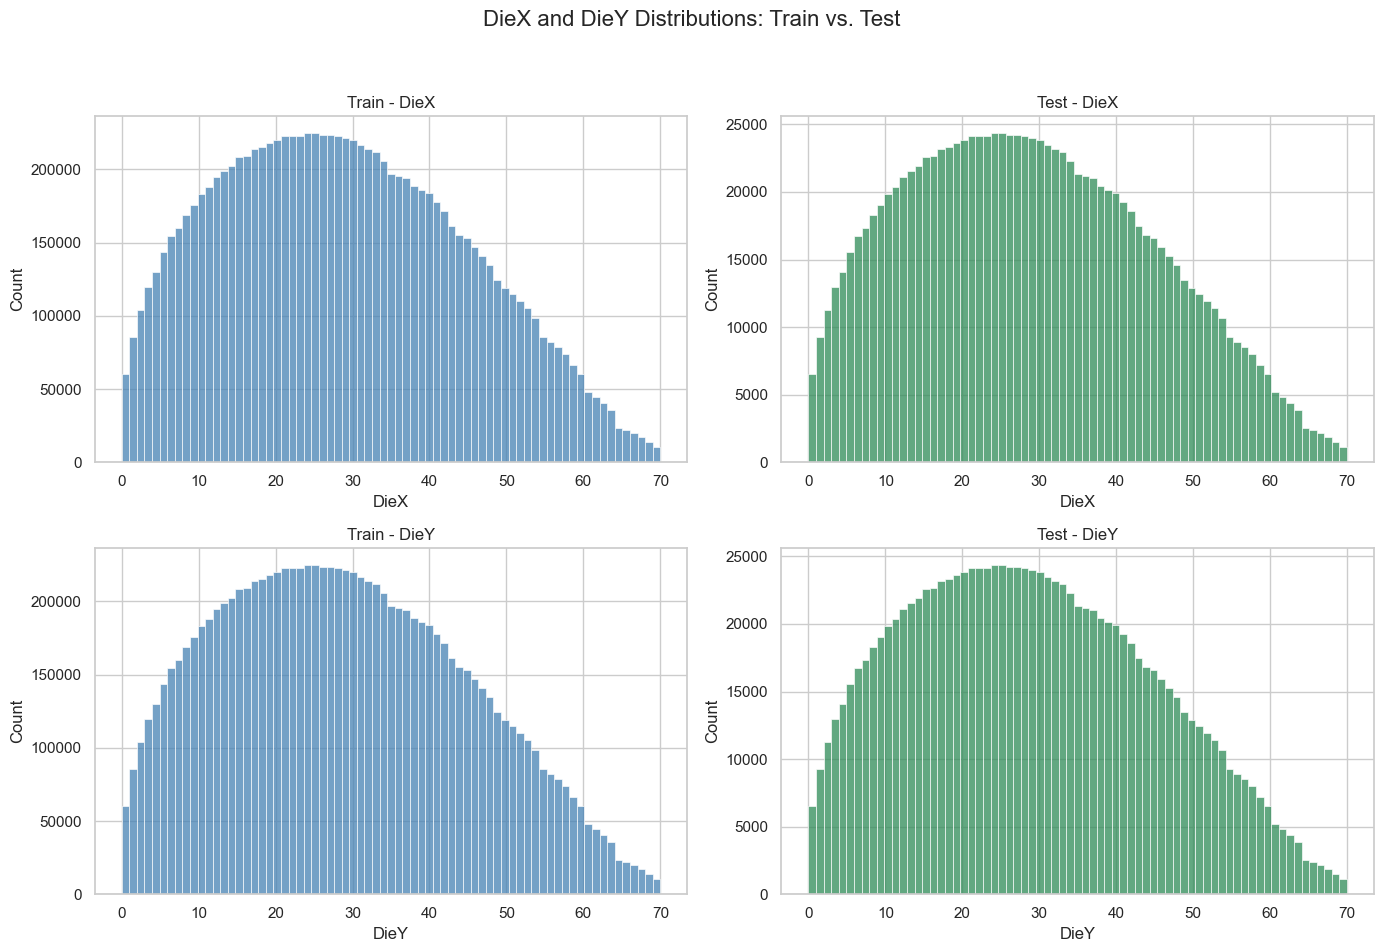


Statistical Summary Comparison:

            Train                   Test           
             DieX        DieY       DieX       DieY
count 10415400.00 10415400.00 1128335.00 1128335.00
mean        28.93       28.93      28.93      28.93
std         16.03       16.03      16.03      16.03
min          0.00        0.00       0.00       0.00
25%         16.00       16.00      16.00      16.00
50%         28.00       28.00      28.00      28.00
75%         41.00       41.00      41.00      41.00
max         70.00       70.00      70.00      70.00


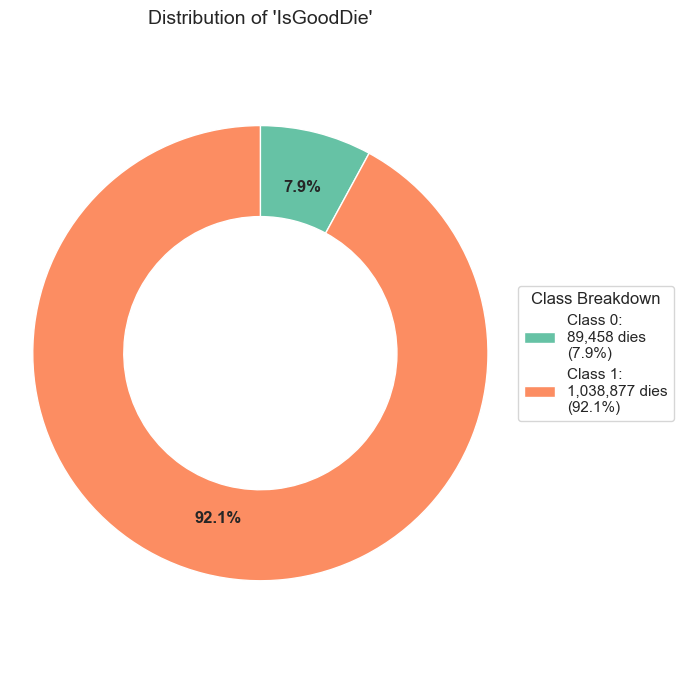

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.float_format', lambda x: f'{x:.2f}')
sns.set(style="whitegrid")

# Plot distributions of DieX and DieY for both datasets
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("DieX and DieY Distributions: Train vs. Test", fontsize=16)

# DieX distribution
sns.histplot(train_df["DieX"], bins=71, color='steelblue', ax=axes[0, 0])
axes[0, 0].set_title("Train - DieX")

sns.histplot(test_df["DieX"], bins=71, color='seagreen', ax=axes[0, 1])
axes[0, 1].set_title("Test - DieX")

# DieY distribution
sns.histplot(train_df["DieY"], bins=71, color='steelblue', ax=axes[1, 0])
axes[1, 0].set_title("Train - DieY")

sns.histplot(test_df["DieY"], bins=71, color='seagreen', ax=axes[1, 1])
axes[1, 1].set_title("Test - DieY")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Compare statistical summaries of spatial features
train_summary = train_df[["DieX", "DieY"]].describe().round(2)
test_summary = test_df[["DieX", "DieY"]].describe().round(2)

# Concatenate for side-by-side comparison
comparison_df = pd.concat([train_summary, test_summary], axis=1, keys=["Train", "Test"])
print("\nStatistical Summary Comparison:\n")
print(comparison_df)

plot_boolean_donut(test_df, "IsGoodDie")


### A distribution shift was observed in the `IsGoodDie` feature between the training (3.7%) and test sets (7.9%). Since this feature is highly predictive of scratches, the difference may affect model behavior. As the split was predefined, the feature was retained as-is, while acknowledging this potential domain shift.


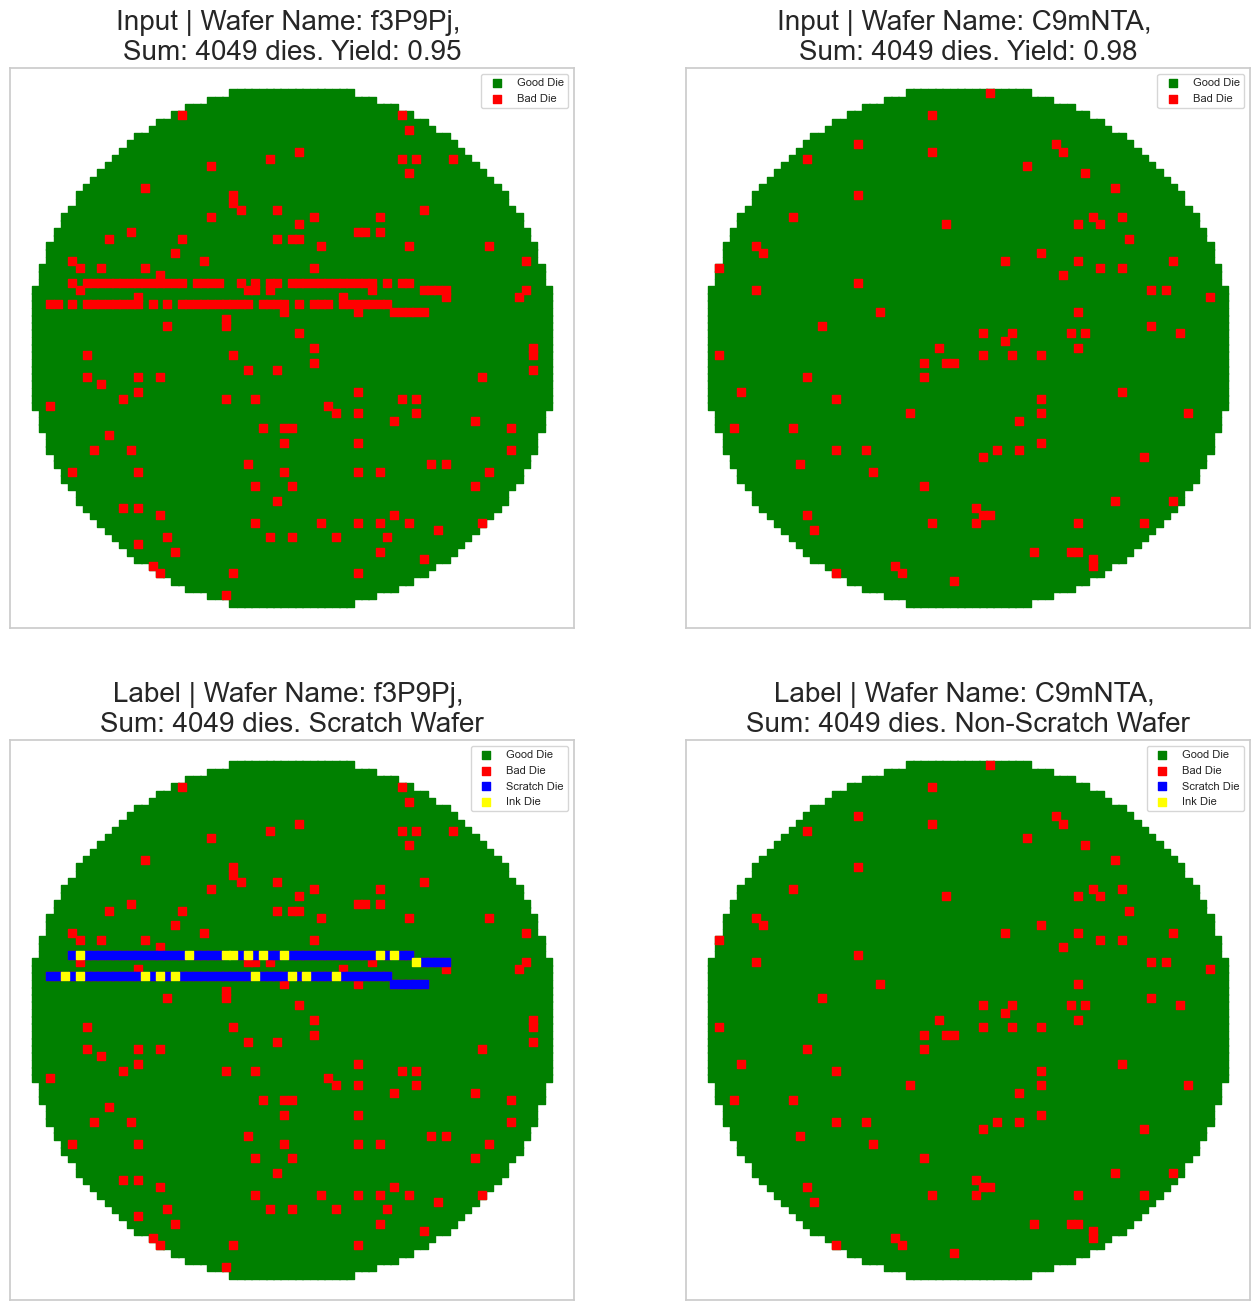

In [ ]:
# Visualize one wafer with a clear scratch pattern and one without, to motivate spatial feature engineering

# Wafer with clear scratch pattern (high scratch count)
scratch_counts = train_df[train_df["IsScratchDie"] == True]["WaferName"].value_counts()
wafer_with_pattern = scratch_counts.idxmax()  # wafer with most scratches

# Wafer without scratches (for contrast)
wafer_without_pattern = train_df[train_df["IsScratchDie"] == False]["WaferName"].value_counts().idxmax()

# Create wafer list for visualization
wafer_df_list = [
    train_df[train_df["WaferName"] == wafer_with_pattern],
    train_df[train_df["WaferName"] == wafer_without_pattern]
]

# Visualize both wafers
plot_wafer_maps(wafer_df_list, figsize=8, labels=True)


#### Data Preprocessing   
##### Most of the steps in this section are not needed because:
###### - There are no outliers (according to the Describe table of the data)
###### - There are no missing values
###### - The data has already been split into training and testing
###### Discretization and dimensionality reduction - will be performed later after feature extraction

## Feature Engineering - Feature Extraction
### Scratches are **spatial patterns** elongated sequences of faulty dies – so I designed features that capture location, density, and neighborhood information. Together, these features aim to simulate how a human inspector perceives linear scratch structures.


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial import cKDTree
from sklearn.cluster import KMeans

import numpy as np
import pandas as pd
from scipy.spatial import cKDTree

def extract_features(df):
    """
    Adds spatial, neighbor-based, and wafer-level features to the wafer dataset.
    Only label-independent features are included to avoid data leakage.
    """

    # ------------------------
    # Spatial Features
    # ------------------------

    # 1. DieCenterDist: Euclidean distance from wafer center
    # Helps detect spatial bias — scratches often appear near edges or radial zones
    wafer_centers = df.groupby("WaferName")[["DieX", "DieY"]].mean().rename(
        columns={"DieX": "CenterX", "DieY": "CenterY"}
    )
    df = df.merge(wafer_centers, on="WaferName", how="left")
    df["DieCenterDist"] = np.sqrt((df["DieX"] - df["CenterX"])**2 + (df["DieY"] - df["CenterY"])**2)

    # 2. AngleFromCenter: angle (in radians) relative to wafer center
    # May capture directional patterns like linear or rotational scratches
    df["AngleFromCenter"] = np.arctan2(df["DieY"] - df["CenterY"], df["DieX"] - df["CenterX"])

    # 3. IsEdge: die located within 1 unit of wafer boundary
    # Edge dies are more susceptible to ink or mechanical impact
    wafer_bounds = df.groupby("WaferName")[["DieX", "DieY"]].agg(["min", "max"])
    wafer_bounds.columns = ["DieX_min", "DieX_max", "DieY_min", "DieY_max"]
    df = df.merge(wafer_bounds, on="WaferName", how="left")

    df["IsEdge"] = (
        (df["DieX"] <= df["DieX_min"] + 1) | (df["DieX"] >= df["DieX_max"] - 1) |
        (df["DieY"] <= df["DieY_min"] + 1) | (df["DieY"] >= df["DieY_max"] - 1)
    ).astype(bool)

    # 4. IsCorner: die located in one of the 4 wafer corners
    # Some scratch patterns initiate at physical corners
    df["IsCorner"] = (
        ((df["DieX"] <= df["DieX_min"] + 1) & (df["DieY"] <= df["DieY_min"] + 1)) |
        ((df["DieX"] <= df["DieX_min"] + 1) & (df["DieY"] >= df["DieY_max"] - 1)) |
        ((df["DieX"] >= df["DieX_max"] - 1) & (df["DieY"] <= df["DieY_min"] + 1)) |
        ((df["DieX"] >= df["DieX_max"] - 1) & (df["DieY"] >= df["DieY_max"] - 1))
    ).astype(bool)

    # 5. DieQuadrant: assign quadrant (1 to 4) based on die's position relative to wafer center
    # Q1: top-right, Q2: top-left, Q3: bottom-left, Q4: bottom-right
    df["DieQuadrant"] = (
        (df["DieX"] > df["CenterX"]).astype(int) * 1 +
        (df["DieY"] > df["CenterY"]).astype(int) * 2
    )
    df["DieQuadrant"] = df["DieQuadrant"].map({0: 3, 1: 4, 2: 2, 3: 1})  # map to Q1-Q4

    # ------------------------
    # Wafer-level Features
    # ------------------------

    # 6. WaferYield: percentage of good dies in wafer
    # Useful for context — low yield doesn't always mean scratch, but may correlate
    wafer_yield = df.groupby("WaferName")["IsGoodDie"].mean().rename("WaferYield")
    df = df.merge(wafer_yield, on="WaferName", how="left")

    # 7. WaferArea: surface area estimate (bounding box)
    # Normalizing factor for position or density
    wafer_area = ((df["DieX_max"] - df["DieX_min"] + 1) * (df["DieY_max"] - df["DieY_min"] + 1)).rename("WaferArea")
    df["WaferArea"] = wafer_area

    # ------------------------
    # Neighbor-based Features (Fast KD-Tree version)
    # ------------------------

    # Instead of performing millions of repetitive lookups per die to find its neighbors,
    # I use a fast and efficient KD-Tree structure to perform spatial neighbor searches
    # in logarithmic time per wafer. This drastically reduces runtime from hours to minutes.
    def count_neighbors_kdtree(df, flag_column):
        neighbor_counts = pd.Series(index=df.index, dtype=int)

        for wafer, wafer_df in df.groupby("WaferName"):
            coords = wafer_df[["DieX", "DieY"]].values
            tree = cKDTree(coords)
            neighbors_list = tree.query_ball_point(coords, r=3.5)
            flags = wafer_df[flag_column].values.astype(int)
            counts = []
            for idx, neighbors in enumerate(neighbors_list):
                count = sum(flags[neighbor] for neighbor in neighbors if neighbor != idx)
                counts.append(count)
            neighbor_counts.loc[wafer_df.index] = counts

        return neighbor_counts
    # Although representing wafers as 2D matrices allows for fast convolution-based neighbor operations,
    # I chose KD-Tree due to its flexibility in handling irregular die distributions, sparse wafer layouts,
    # and precise radius-based neighbor queries, which are essential in this dataset.

    # 8. BadDie_Neighbors: number of adjacent dies that are not good
    # Indicates local spatial damage clusters
    df["BadDie_Neighbors"] = count_neighbors_kdtree(df, "IsGoodDie").astype(int)

    # ------------------------
    # Clean up temp columns
    df.drop(columns=["CenterX", "CenterY", "DieX_min", "DieX_max", "DieY_min", "DieY_max"], inplace=True)


    # Local Irregularity: % of neighbors that differ in IsGoodDie
    def compute_local_irregularity(df):
        irregularity = pd.Series(index=df.index, dtype=float)
        for wafer, wafer_df in df.groupby("WaferName"):
            coords = wafer_df[["DieX", "DieY"]].values
            tree = cKDTree(coords)
            neighbors_list = tree.query_ball_point(coords, r=3.5)
            labels = wafer_df["IsGoodDie"].values.astype(int)
            scores = []
            for idx, neighbors in enumerate(neighbors_list):
                if len(neighbors) <= 1:
                    scores.append(0)
                    continue
                different = sum(labels[n] != labels[idx] for n in neighbors if n != idx)
                scores.append(different / (len(neighbors) - 1))
            irregularity.loc[wafer_df.index] = scores
        return irregularity

    df["LocalIrregularity"] = compute_local_irregularity(df)


    # Wafer-level KMeans clustering (unsupervised region encoding)
    def assign_kmeans_clusters(df, n_clusters=4):
        cluster_labels = pd.Series(index=df.index, dtype=int)
        for wafer, wafer_df in df.groupby("WaferName"):
            X = wafer_df[["DieX", "DieY", "IsGoodDie"]].values
            if len(wafer_df) < n_clusters:
                cluster_labels.loc[wafer_df.index] = 0
                continue
            kmeans = KMeans(n_clusters=n_clusters, n_init=5, random_state=42)
            labels = kmeans.fit_predict(X)
            cluster_labels.loc[wafer_df.index] = labels
        return cluster_labels

    df["KMeansCluster"] = assign_kmeans_clusters(df)


    #Smoothed Local Yield – average IsGoodDie in a 5x5 window
    def compute_smoothed_yield(df):
        smoothed_yield = pd.Series(index=df.index, dtype=float)
        for wafer, wafer_df in df.groupby("WaferName"):
            coords = wafer_df[["DieX", "DieY"]].values
            tree = cKDTree(coords)
            neighbors_list = tree.query_ball_point(coords, r=2.5)
            labels = wafer_df["IsGoodDie"].values.astype(int)
            yields = []
            for neighbors in neighbors_list:
                local_yield = labels[neighbors].mean()
                yields.append(local_yield)
            smoothed_yield.loc[wafer_df.index] = yields
        return smoothed_yield

    df["SmoothedLocalYield"] = compute_smoothed_yield(df)
        # ------------------------
    # Streak-based Features: contiguous bad dies in same row/column
    # Although this feature is more computationally expensive,
    # it captures the linear structure of scratches (as defect streaks),
    # which complements the radial neighbor-based features and demonstrates geometric insight.

    # ------------------------
    df["BadStreakLength_X"] = 0
    df["BadStreakLength_Y"] = 0

    for wafer, wafer_df in df.groupby("WaferName"):
        # --- Row-wise streaks (along X) ---
        for y_val in wafer_df["DieY"].unique():
            row = wafer_df[wafer_df["DieY"] == y_val].sort_values("DieX")
            streak = []
            for idx, row_data in row.iterrows():
                if row_data["IsGoodDie"] == 0:
                    streak.append(idx)
                else:
                    if streak:
                        df.loc[streak, "BadStreakLength_X"] = len(streak)
                        streak = []
            if streak:
                df.loc[streak, "BadStreakLength_X"] = len(streak)

        # --- Column-wise streaks (along Y) ---
        for x_val in wafer_df["DieX"].unique():
            col = wafer_df[wafer_df["DieX"] == x_val].sort_values("DieY")
            streak = []
            for idx, col_data in col.iterrows():
                if col_data["IsGoodDie"] == 0:
                    streak.append(idx)
                else:
                    if streak:
                        df.loc[streak, "BadStreakLength_Y"] = len(streak)
                        streak = []
            if streak:
                df.loc[streak, "BadStreakLength_Y"] = len(streak)

    return df


train_df_with_fe = extract_features(train_df)

train_df_with_fe.to_csv("train_df_with_fe.csv")

#### As part of my feature selection process, I apply both statistical and model-based techniques:
##### 1. Statistical filtering includes:
######    - Pearson correlation (numeric-numeric),
######    - Spearman correlation (numeric-categorical),
######    - Chi-squared test (categorical-categorical),
######    - Welch's t-test (numeric vs target) to assess class separation capability.
###### (I didn't check for multicollinearity because I intend to use nonlinear models that can handle it. )
##### 2. Visual distribution analysis (KDE plots) complements the weltch-tests to inspect how features differ across classes.
##### 3. Model-based filtering will follow (Feature importance/SHAP) to validate and prioritize features.


Step 1: Correlations

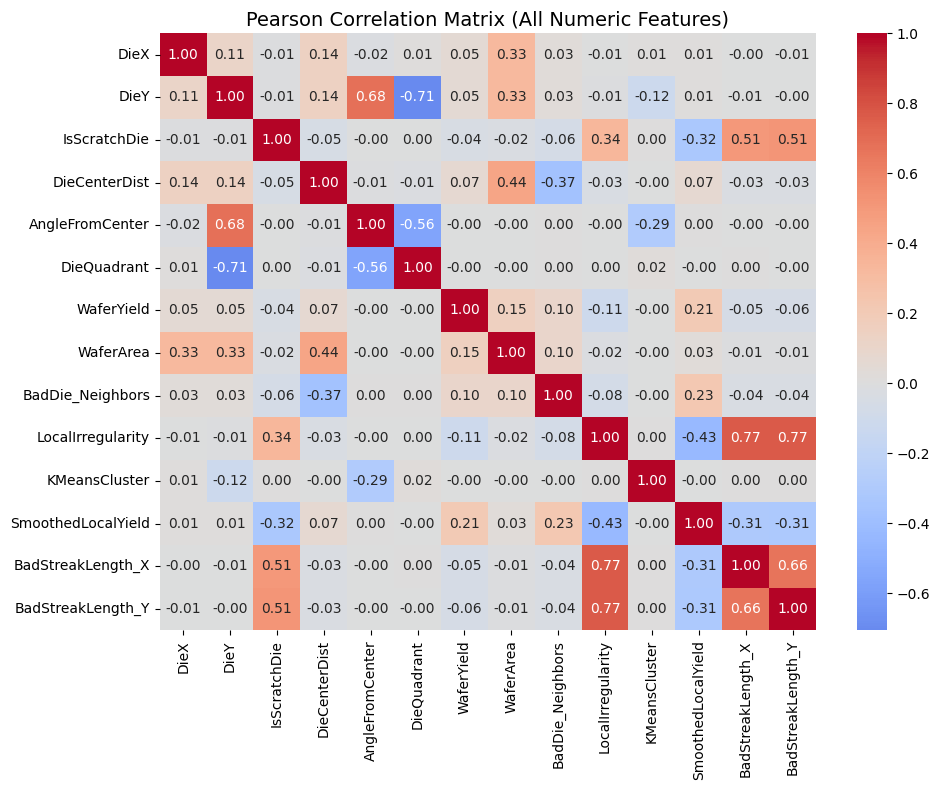


Highly correlated feature pairs (|corr| > 0.4):
LocalIrregularity vs BadStreakLength_Y: corr = 0.769
LocalIrregularity vs BadStreakLength_X: corr = 0.765
DieY vs DieQuadrant: corr = -0.706
DieY vs AngleFromCenter: corr = 0.683
BadStreakLength_X vs BadStreakLength_Y: corr = 0.663
AngleFromCenter vs DieQuadrant: corr = -0.561
IsScratchDie vs BadStreakLength_Y: corr = 0.515
IsScratchDie vs BadStreakLength_X: corr = 0.507
DieCenterDist vs WaferArea: corr = 0.438
LocalIrregularity vs SmoothedLocalYield: corr = -0.427

Pearson correlation with target (|corr| > 0.1):
  BadStreakLength_Y: 0.515
  BadStreakLength_X: 0.507
  LocalIrregularity: 0.339
  SmoothedLocalYield: -0.320

Spearman correlation (only strong correlations):
  BadDie_Neighbors vs IsEdge: Spearman ρ = -0.378
  LocalIrregularity vs IsGoodDie: Spearman ρ = -0.334
  BadStreakLength_X vs IsGoodDie: Spearman ρ = -1.000
  BadStreakLength_Y vs IsGoodDie: Spearman ρ = -1.000

Chi-squared test (only significant results):
  IsGoodDie vs

In [ ]:
from scipy.stats import spearmanr, chi2_contingency
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
train_df_with_fe = pd.read_csv("train_df_with_fe.csv", index_col=0)
# Thresholds
CORR_THRESHOLD = 0.3
PVAL_THRESHOLD = 0.05
train_df_with_fe["IsScratchDie"] = train_df_with_fe["IsScratchDie"].astype(int) #for heatmap

# Split feature types
numeric_features = train_df_with_fe.select_dtypes(include=["float64", "int64"]).columns.tolist()
categorical_features = train_df_with_fe.select_dtypes(include=["bool", "category"]).columns.tolist()
# --- Pearson Correlation Heatmap (numeric ↔ numeric) ---
corr_matrix = train_df_with_fe[numeric_features].corr(method="pearson")
# Show all correlations in heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", center=0)
plt.title("Pearson Correlation Matrix (All Numeric Features)", fontsize=14)
plt.tight_layout()
plt.show()

# Print pairs of features with strong correlation (|corr| > 0.4), excluding target
print("\nHighly correlated feature pairs (|corr| > 0.4):")
high_corr_pairs = []

for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        feat1 = corr_matrix.columns[i]
        feat2 = corr_matrix.columns[j]
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) > 0.4:
            high_corr_pairs.append((feat1, feat2, corr_val))

for f1, f2, val in sorted(high_corr_pairs, key=lambda x: -abs(x[2])):
    print(f"{f1} vs {f2}: corr = {val:.3f}")


# Print correlation with target only if strong
target_corr = corr_matrix["IsScratchDie"].drop("IsScratchDie").sort_values(key=abs, ascending=False)
print("\nPearson correlation with target (|corr| > 0.1):")
for feature, corr in target_corr.items():
    if abs(corr) > 0.1:
        print(f"  {feature}: {corr:.3f}")

# --- Spearman (Numeric ↔ Binary Categorical) ---
print("\nSpearman correlation (only strong correlations):")
numeric_features.remove("IsScratchDie")
for num_feat in numeric_features:
    for cat_feat in categorical_features:
        if train_df_with_fe[cat_feat].nunique() == 2:
            corr, _ = spearmanr(train_df_with_fe[num_feat], train_df_with_fe[cat_feat].astype(int))
            if abs(corr) > CORR_THRESHOLD:
                print(f"  {num_feat} vs {cat_feat}: Spearman ρ = {corr:.3f}")

# --- Chi-squared (Categorical ↔ Categorical) ---
print("\nChi-squared test (only significant results):")
for i, feat1 in enumerate(categorical_features):
    for feat2 in categorical_features[i+1:]:
        contingency = pd.crosstab(train_df_with_fe[feat1], train_df_with_fe[feat2])
        chi2, p, _, _ = chi2_contingency(contingency)
        if p < PVAL_THRESHOLD:
            print(f"  {feat1} vs {feat2}: χ² p-value = {p:.5f}")


##### Since I perform multiple statistical tests (Welch’s t-test and Chi-squared) across several features, and the dataset is very large, there's an increased likelihood of observing statistically significant results (very low p-values) even for negligible effects. However, I choosed not to apply FDR correction because the total number of tested features (~15) is relatively small, and feature selection is guided by a combination of statistical tests, domain knowledge, visual analysis, and model-based importance — reducing the risk of false discoveries.


Step 2 - Welch t-tests & plots

Welch's t-test for feature 'DieX':
  t-statistic = 31.847
  p-value     = 0.00000
  Statistically significant difference between the groups.
--------------------------------------------------
Welch's t-test for feature 'DieY':
  t-statistic = 29.915
  p-value     = 0.00000
  Statistically significant difference between the groups.
--------------------------------------------------
Welch's t-test for feature 'DieCenterDist':
  t-statistic = 171.543
  p-value     = 0.00000
  Statistically significant difference between the groups.
--------------------------------------------------
Welch's t-test for feature 'AngleFromCenter':
  t-statistic = 4.467
  p-value     = 0.00001
  Statistically significant difference between the groups.
--------------------------------------------------
Welch's t-test for feature 'DieQuadrant':
  t-statistic = -1.010
  p-value     = 0.31258
--------------------------------------------------
Welch's t-test for feature 'WaferYield':
  t-statistic = 127.882
  p-val

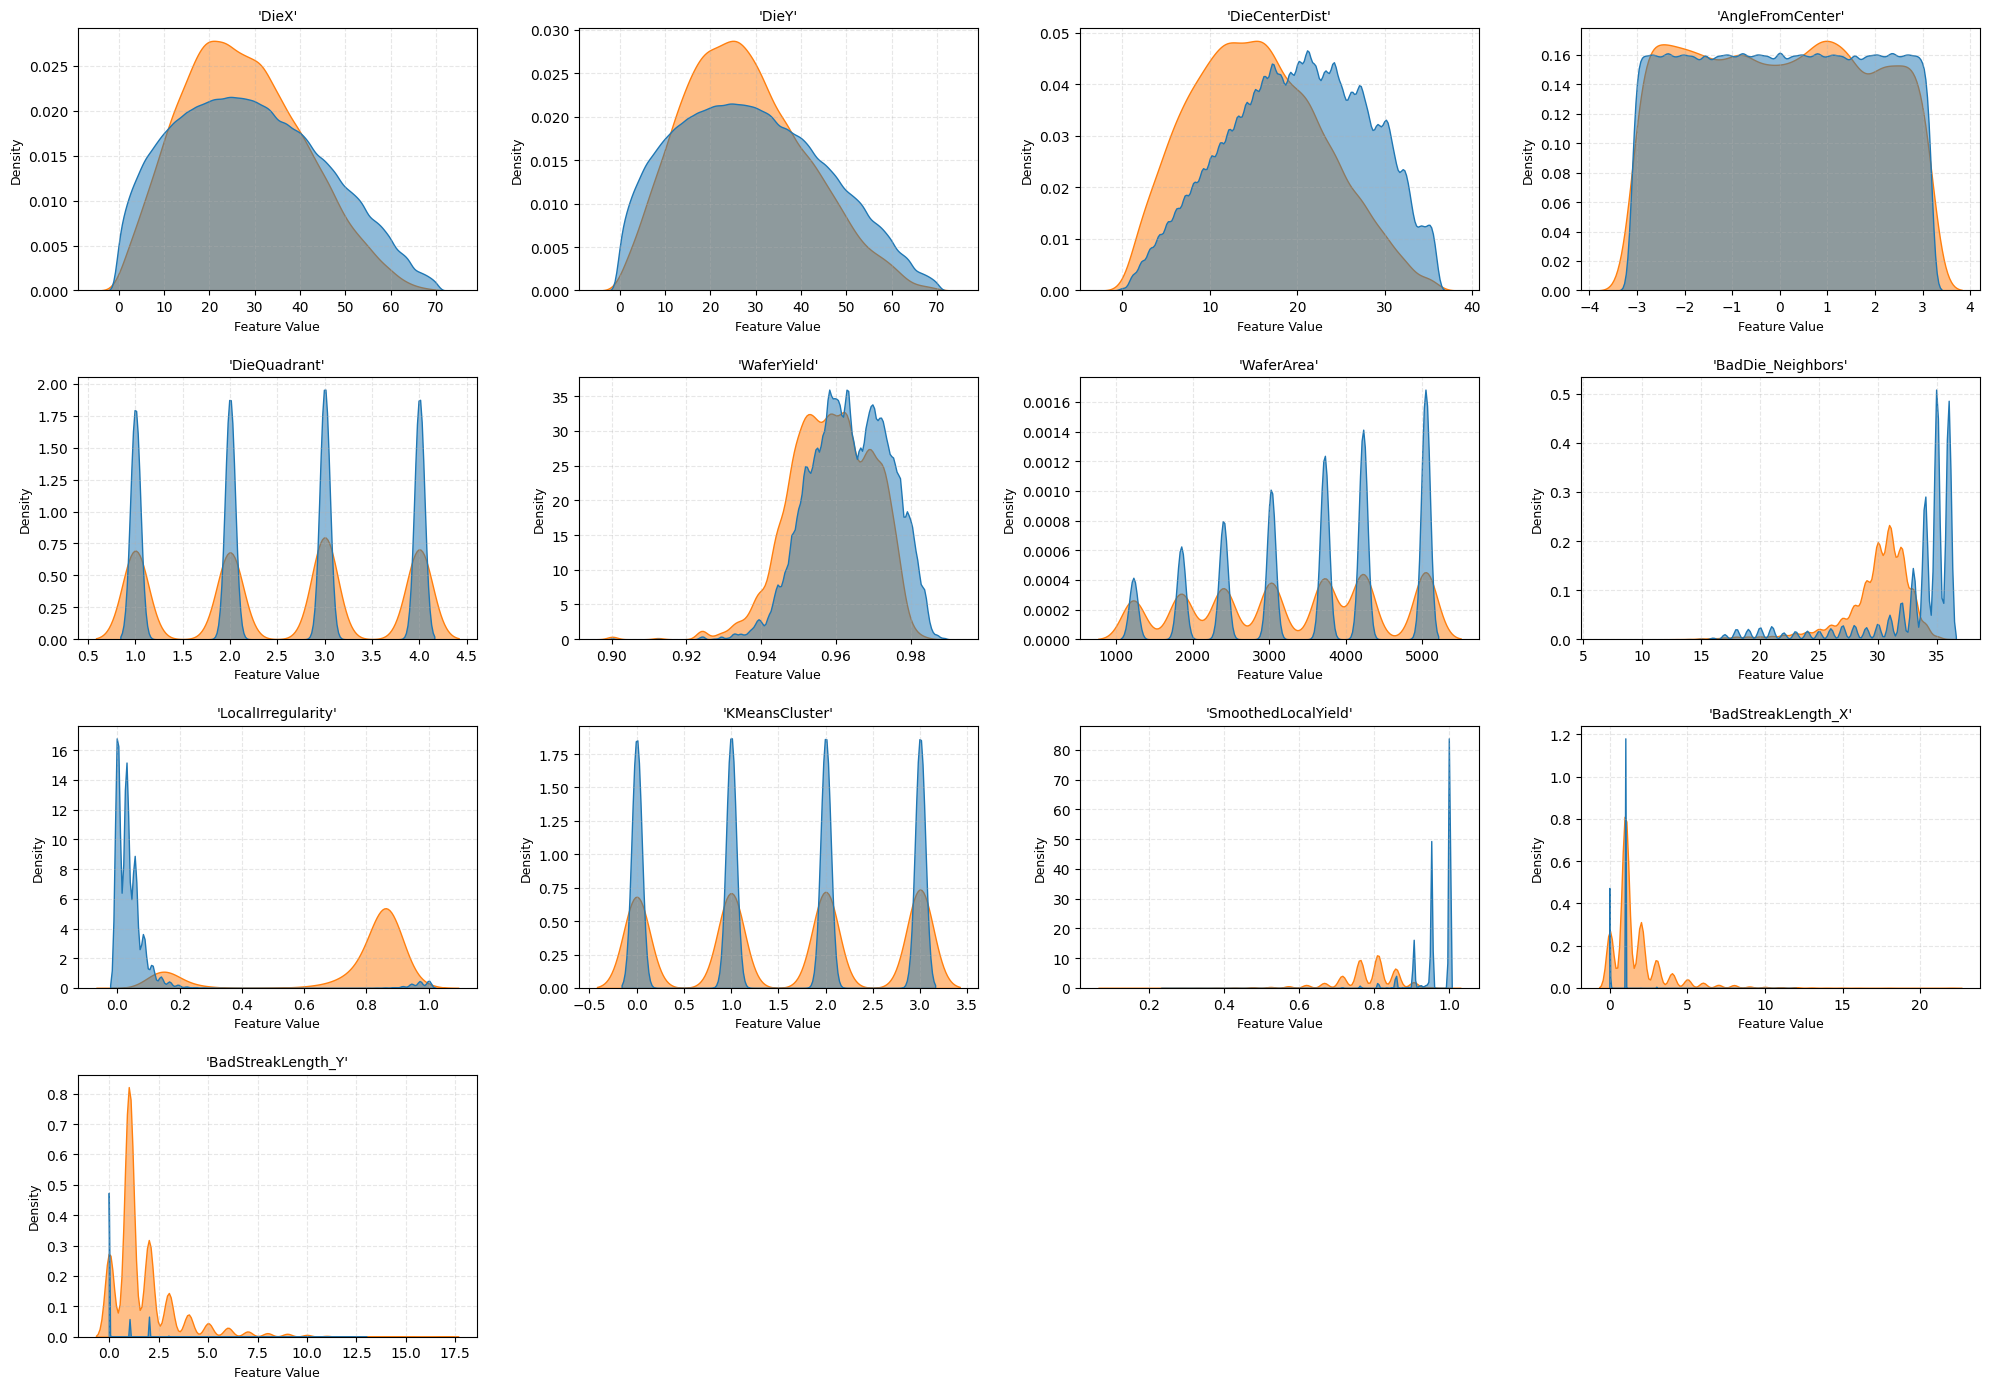

In [ ]:
from scipy.stats import ttest_ind
import math
import matplotlib.pyplot as plt
import seaborn as sns

def plot_feature_distribution(df, feature, target, ax):
    """
    Visualizes how a numeric feature is distributed across the target classes (e.g., IsScratchDie).
    """
    # Convert target to string to avoid legend issues with boolean
    df_copy = df.copy()
    df_copy[target] = df_copy[target].astype(str)

    # Plot
    sns.kdeplot(data=df_copy, x=feature, hue=target,
                common_norm=False, fill=True, alpha=0.5, bw_adjust=1.2, ax=ax)
    ax.set_title(f"'{feature}'", fontsize=10)
    ax.set_xlabel("Feature Value", fontsize=9)
    ax.set_ylabel("Density", fontsize=9)
    ax.grid(True, linestyle='--', alpha=0.3)
    ax.legend_.remove()

def welch_test_by_target(df, feature, target="IsScratchDie"):
    group_0 = df[df[target] == 0][feature]
    group_1 = df[df[target] == 1][feature]

    t_stat, p_value = ttest_ind(group_0, group_1, equal_var=False)

    print(f"Welch's t-test for feature '{feature}':")
    print(f"  t-statistic = {t_stat:.3f}")
    print(f"  p-value     = {p_value:.5f}")
    if p_value < 0.05:
        print("  Statistically significant difference between the groups.")
    #else:
    #    print(" No significant difference found.\n")
numeric_features = train_df_with_fe.select_dtypes(include=["float64", "int64"]).columns.tolist()
numeric_features = [f for f in numeric_features if f not in ["IsScratchDie","Unnamed: 0"]]
features_to_check = [f for f in numeric_features if train_df_with_fe[f].nunique() > 2]

n_feats = len(features_to_check)
n_cols = 4
n_rows = math.ceil(n_feats / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 3.5 * n_rows))
axes = axes.flatten()

for i, feature in enumerate(features_to_check):
    plot_feature_distribution(train_df_with_fe, feature, target="IsScratchDie", ax=axes[i])
    welch_test_by_target(train_df_with_fe, feature)
    print("-" * 50)

#Delete empty axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(h_pad=1.8, w_pad=1.2)
plt.show()


While most Welch's t-tests yielded statistically significant results across features, the density plots reveal minimal practical differences between the classes. This highlights a known limitation of statistical tests on large datasets—small effect sizes can still produce significant p-values.


**Despite the statistical significance** and moderate correlations observed among several features, I deliberately retained them, as XGBoost feature importance indicated substantial contribution from most variables. Given the low feature-to-sample ratio, the risk of overfitting remains minimal.


###  Unsupervised Clustering Attempt (PCA + KMeans)

To explore the separability of scratch vs. non-scratch dies using only feature structure (without labels), I applied PCA for dimensionality reduction and KMeans clustering.


Adjusted Rand Index (cluster vs IsScratchDie): 0.000


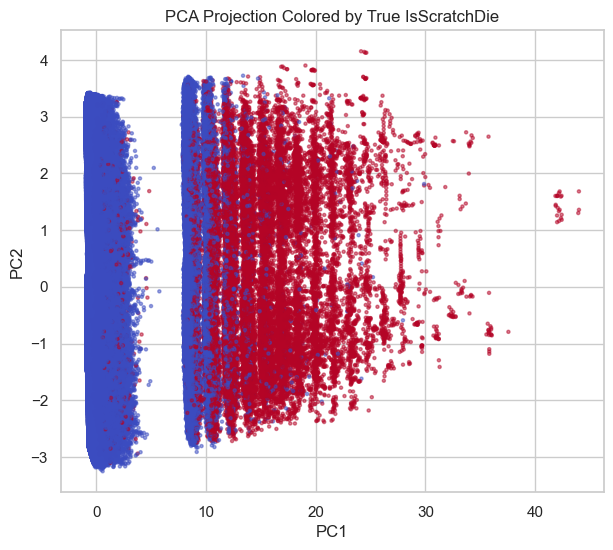

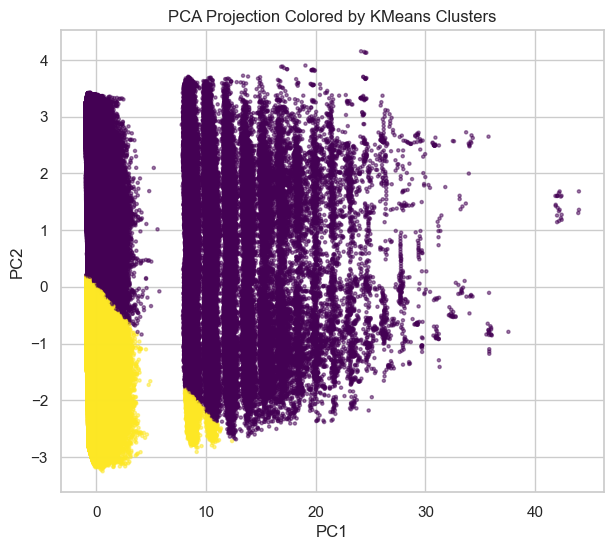

In [ ]:

#I apply PCA to the engineered features to visualize the latent structure and perform clustering.
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt
import pandas as pd

# Load data
df = pd.read_csv("train_df_with_fe.csv", index_col=0)

# Include both continuous and binary features
features=[ 'DieX', 'DieY', 'IsGoodDie',
  'DieCenterDist', 'AngleFromCenter', 'IsEdge', 'DieQuadrant', 'WaferYield', 'WaferArea',
  'BadDie_Neighbors', 'LocalIrregularity', 'KMeansCluster', 'SmoothedLocalYield', 'BadStreakLength_X', 'BadStreakLength_Y']

X = df[features]
y_true = df["IsScratchDie"].astype(int)

# Normalize
X_scaled = StandardScaler().fit_transform(X)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
cluster_labels = kmeans.fit_predict(X_pca)

# Adjusted Rand Index (clustering vs true labels)
ari = adjusted_rand_score(y_true, cluster_labels)
print(f"Adjusted Rand Index (cluster vs IsScratchDie): {ari:.3f}")

# Plot 1: PCA projection colored by true labels
plt.figure(figsize=(7,6))
for label, color, name in zip([0, 1], ['blue', 'red'], ['Not Scratch', 'Scratch']):
    plt.scatter(X_pca[y_true == label, 0], X_pca[y_true == label, 1],
                color=color, label=name, s=5, alpha=0.5)
plt.title('PCA Projection Colored by True IsScratchDie')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True)
plt.show()


# Plot 2: PCA projection colored by KMeans clusters
plt.figure(figsize=(7,6))
unique_clusters = np.unique(cluster_labels)
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_clusters)))

for i, color in zip(unique_clusters, colors):
    plt.scatter(X_pca[cluster_labels == i, 0], X_pca[cluster_labels == i, 1],
                color=color, label=f'Cluster {i}', s=5, alpha=0.5)

plt.title('PCA Projection Colored by KMeans Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True)
plt.show()




As shown below, the resulting clusters do not align with the true `IsScratchDie` labels. The Adjusted Rand Index (ARI) is near zero, suggesting that scratch patterns are not linearly separable in the reduced space.

This highlights the need for supervised learning to capture more complex, possibly spatial or sequential patterns that cannot be learned purely from unsupervised clustering.

In [ ]:
# Define General Functions

# Re-import necessary packages after environment reset
import pandas as pd
import numpy as np
from sklearn.metrics import (
    classification_report, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix, average_precision_score,
    precision_recall_curve
)
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
import seaborn as sns

# Store results for comparison across models
model_results = []

def train_model_with_cv(model, X, y, cv):
    """
    Train the model using cross-validation and return predicted probabilities.
    This allows unbiased evaluation without using a separate validation set.
    """
    y_proba = cross_val_predict(model, X, y, cv=cv, method='predict_proba')[:, 1]
    return y_proba

def optimize_threshold(y_true, y_proba):
    """
    Identify the optimal threshold for binary classification
    by maximizing the F1 score based on precision-recall curve.
    """
    precision, recall, thresholds = precision_recall_curve(y_true, y_proba)
    fscore = 2 * (precision * recall) / (precision + recall + 1e-8)
    best_thresh = thresholds[np.argmax(fscore)]
    return best_thresh

def evaluate_predictions(y_true, y_pred, y_proba, model_name="Model"):
    """
    Evaluate model performance using standard classification metrics and plots.
    Prints report, draws confusion matrix and PR curve, and logs the results.
    """
    print(f"\n{model_name} Evaluation:")
    print(classification_report(y_true, y_pred, digits=3))
    print(f"Precision: {precision_score(y_true, y_pred):.3f}")
    print(f"Recall:    {recall_score(y_true, y_pred):.3f}")
    print(f"F1 Score:  {f1_score(y_true, y_pred):.3f}")
    print(f"ROC AUC:   {roc_auc_score(y_true, y_proba):.3f}")
    print(f"PR AUC:    {average_precision_score(y_true, y_proba):.3f}")

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix – {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_true, y_proba)
    plt.figure(figsize=(6, 5))
    plt.plot(recall, precision, label="PR Curve")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curve – {model_name}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Log results for comparison
    model_results.append({
        'Model': model_name,
        'Precision': precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1 (class 1)": f1_score(y_true, y_pred),
        "F1 (weighted)": f1_score(y_true, y_pred, average='weighted'),
        "PR AUC": average_precision_score(y_true, y_proba)
    })

    return {
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1 (class 1)": f1_score(y_true, y_pred),
        "F1 (weighted)": f1_score(y_true, y_pred, average='weighted'),
        "PR AUC": average_precision_score(y_true, y_proba),
    }


Step 3 - Feature Importance modeling

class balance ratio (pos_weight): 128.68


C:\Users\wqxb83\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:03:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\wqxb83\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:04:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\wqxb83\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\core.py:158: UserWar


XGBoost Evaluation:
              precision    recall  f1-score   support

           0      0.998     0.998     0.998  10335081
           1      0.764     0.691     0.726     80319

    accuracy                          0.996  10415400
   macro avg      0.881     0.845     0.862  10415400
weighted avg      0.996     0.996     0.996  10415400

Precision: 0.764
Recall:    0.691
F1 Score:  0.726
ROC AUC:   0.992
PR AUC:    0.763


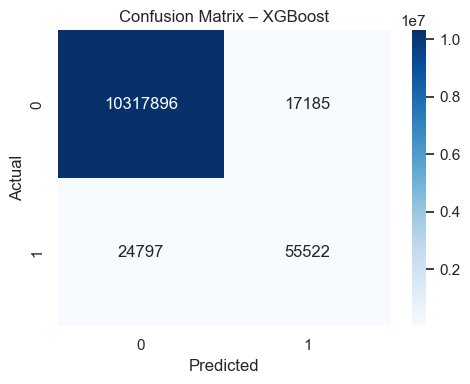

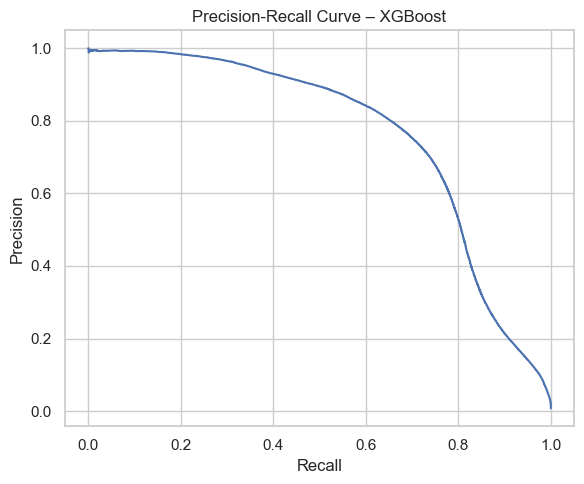

C:\Users\wqxb83\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\core.py:158: UserWarning: [13:06:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\wqxb83\AppData\Local\Temp\ipykernel_22840\1342047332.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")


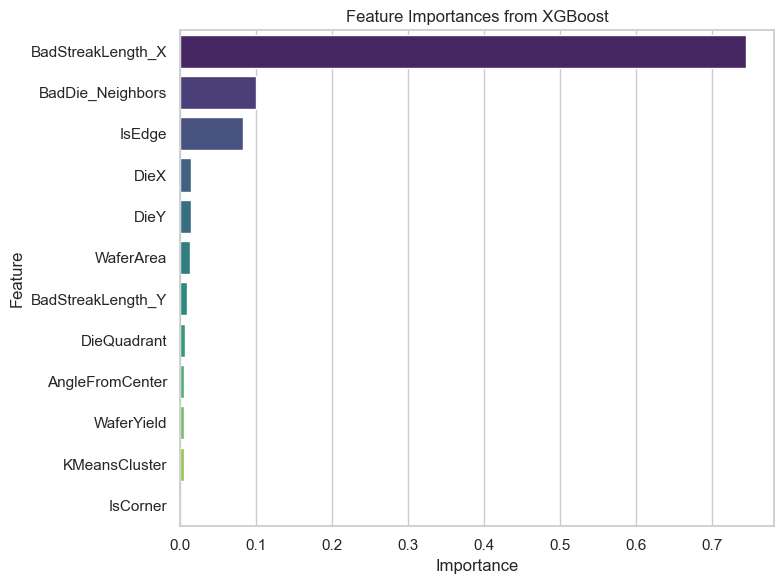

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import (
    classification_report, confusion_matrix,
    roc_auc_score, precision_score, recall_score,
    f1_score, precision_recall_curve
)
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

train_df_with_fe=pd.read_csv("train_df_with_fe.csv", index_col=0)
# Exclude logically dominating features to see the impact of the other features.
features_to_exclude = [
    "IsScratchDie", "WaferName",
    "IsGoodDie", 'LocalIrregularity','DieCenterDist','SmoothedLocalYield']
features = [col for col in train_df_with_fe.columns if col not in features_to_exclude]
target = "IsScratchDie"

X = train_df_with_fe[features]
y = train_df_with_fe[target].astype(int)

# Calculate scale_pos_weight to handle class imbalance
scale_pos_weight = len(y[y == 0]) / len(y[y == 1])
print(f"class balance ratio (pos_weight): {scale_pos_weight:.2f}")

# Define model
model = XGBClassifier(
    use_label_encoder=False,
    eval_metric="logloss",
    random_state=42,
    scale_pos_weight=scale_pos_weight,
    n_jobs=-1
)


# CV setup
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Get cross-validated probability predictions
#y_proba = cross_val_predict(model, X, y, cv=cv, method='predict_proba')[:, 1]

y_proba = train_model_with_cv(model, X, y, cv)
best_thresh = optimize_threshold(y, y_proba)
y_pred = (y_proba >= best_thresh).astype(int)
metrics = evaluate_predictions(y, y_pred, y_proba, model_name="XGBoost")

# Feature importances (fit once for visualization)
model.fit(X, y)
importances = model.feature_importances_
importance_df = pd.DataFrame({"Feature": features, "Importance": importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")
plt.title("Feature Importances from XGBoost")
plt.tight_layout()
plt.show()


####Despite low correlations with the target, correlations between features and limited statistical significance (Welch’s test), most features showed contribution to the model, so all were retained except for `IsCorner`, which consistently showed no predictive value.  
####Given the high data-to-feature ratio (~1M samples vs. 15 features), there was no concern of overfitting due to feature excess.


# Modeling

## Model 1 : Logistic Regression - Baseline

Logistic Regression was used as a linear baseline model to test whether the extracted features can separate the scratch class using a simple decision boundary. It provides interpretability and acts as a benchmark for more complex models.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



Logistic Regression Evaluation:
              precision    recall  f1-score   support

       False      0.995     0.998     0.996  10335081
        True      0.581     0.327     0.418     80319

    accuracy                          0.993  10415400
   macro avg      0.788     0.663     0.707  10415400
weighted avg      0.992     0.993     0.992  10415400

Precision: 0.581
Recall:    0.327
F1 Score:  0.418
ROC AUC:   0.696
PR AUC:    0.330


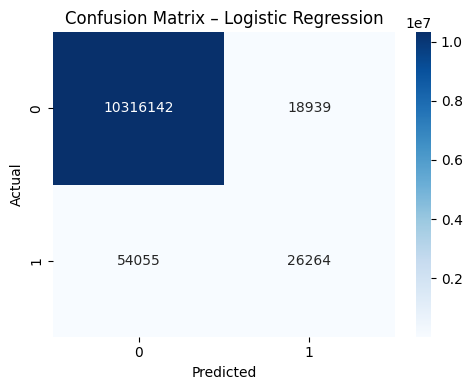

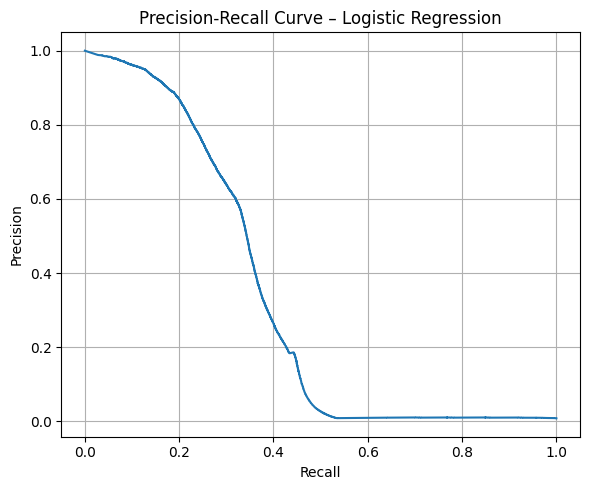

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import (
    classification_report, confusion_matrix,
    roc_auc_score, precision_score, recall_score,
    f1_score, precision_recall_curve,average_precision_score
)
import matplotlib.pyplot as plt
import seaborn as sns

train_df_with_fe=pd.read_csv("/content/drive/MyDrive/train_df_with_fe.csv", index_col=0)

X = train_df_with_fe.drop(columns=["IsScratchDie","WaferName"])
y = train_df_with_fe['IsScratchDie']

# Model definition
logreg = LogisticRegression(
    class_weight='balanced',
    max_iter=100,
    solver='saga',
    random_state=42,
)

# 2-fold stratified CV
cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

# Get predictions
# y_pred = cross_val_predict(logreg, X, y, cv=cv, method='predict')
# y_proba = cross_val_predict(logreg, X, y, cv=cv, method='predict_proba')[:, 1]

y_proba = train_model_with_cv(logreg, X, y, cv)
best_thresh = optimize_threshold(y, y_proba)
y_pred = (y_proba >= best_thresh).astype(int)
metrics = evaluate_predictions(y, y_pred, y_proba, model_name="Logistic Regression")



The model performed poorly, likely due to the limited capacity of linear models to capture complex spatial interactions and non-linear patterns in the data.


### Model 2 : XGBoost

##### XGBoost was applied as a powerful gradient boosting method that optimizes performance with regularization, making it ideal for complex patterns and moderately imbalanced data.


In [ ]:
!pip install xgboost

Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [21:22:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Params: {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1}


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [21:23:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [21:23:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [21:23:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost (Tuned) Evaluation:
              precision    recall  f1-score   support

           0      0.998     0.998     0.998  10335081
           1      0.769     0.723     0.745     80319

    accuracy                          0.996  10415400
   macro avg      0.883     0.860     0.872  10415400
weighted avg      0.996     0.996     0.996  10415400

Precision: 0.769
Recall:    0.723
F1 Score:  0.745
ROC AUC:   0.994
PR AUC:    0.783


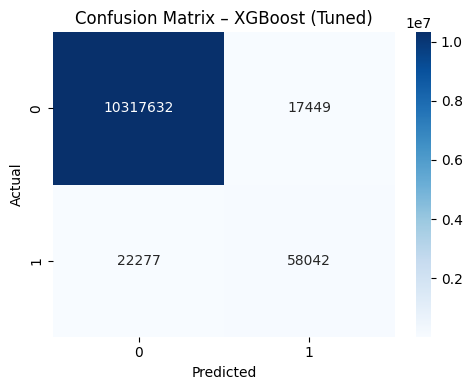

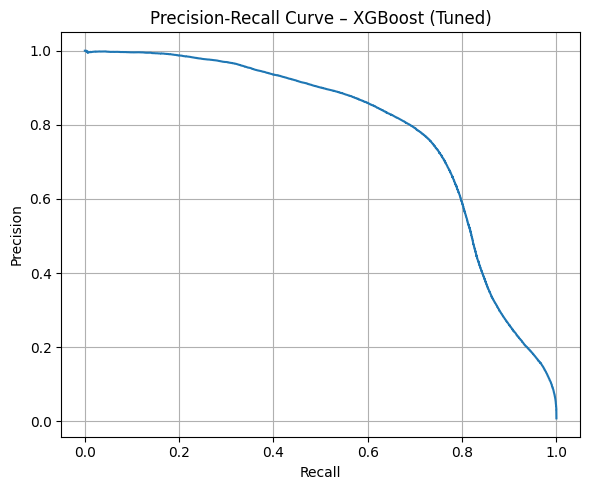

<ipython-input-17-91a0bdc9e90f>:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")


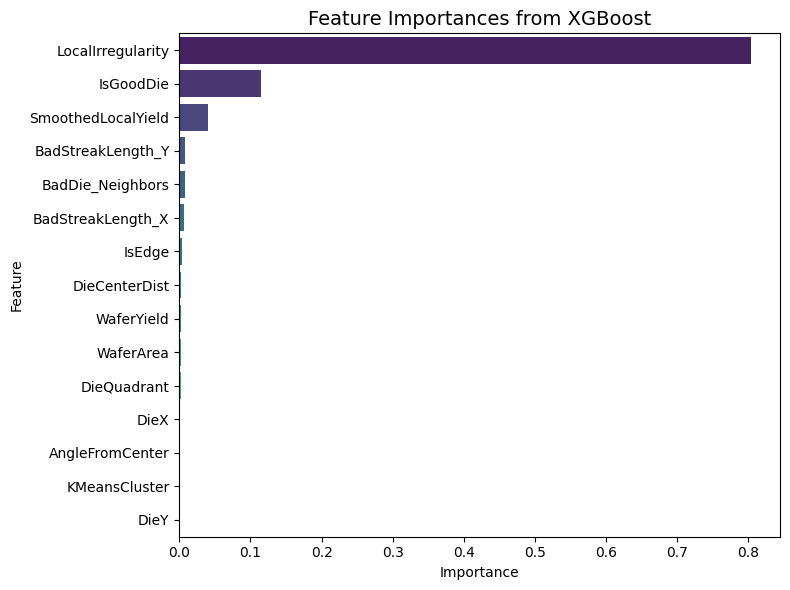

In [ ]:
from sklearn.model_selection import train_test_split,StratifiedKFold, cross_val_predict, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve,roc_auc_score,accuracy_score,average_precision_score,precision_score,recall_score,f1_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


train_df_with_fe=pd.read_csv("/content/drive/MyDrive/train_df_with_fe.csv",index_col=0)

train_df_with_fe['IsEdge']=train_df_with_fe['IsEdge'].astype(bool)
# Features and target (drop non-predictive or target-related columns)
X = train_df_with_fe.drop(columns=["IsScratchDie","IsCorner","WaferName"])#
y = train_df_with_fe["IsScratchDie"].astype(int)


# Handle class imbalance
scale_pos_weight = y.value_counts()[0] / y.value_counts()[1]

# Base model
model = XGBClassifier(
    use_label_encoder=False,
    eval_metric="logloss",
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    n_jobs=-1
)

# Hyperparameter search space
param_grid = {
    "max_depth": [3, 5, 8],
    "learning_rate": [0.01,0.1, 0.3],
    "n_estimators": [100,200,300],
    "subsample": [0.8,0.9,1],
    "colsample_bytree": [0.8,0.9,1]
}
#Best Params: {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1}
param_grid =  {
    "max_depth": [5],
    "learning_rate": [0.1],
    "n_estimators": [200],
    "subsample": [1],
    "colsample_bytree": [1]
}
# Stratified K-Fold to preserve class ratio
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Grid search using PR-AUC (good for imbalanced data)
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='average_precision',
    cv=cv,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X, y)
best_model = grid_search.best_estimator_
print("Best Params:", grid_search.best_params_)

# Cross-validated predicted probabilities

y_proba = train_model_with_cv(best_model, X, y, cv)
best_thresh = optimize_threshold(y, y_proba)
y_pred = (y_proba >= best_thresh).astype(int)
metrics = evaluate_predictions(y, y_pred, y_proba, model_name="XGBoost (Tuned)")

#Feature Importance Plot
importances = best_model.feature_importances_
importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")
plt.title("Feature Importances from XGBoost", fontsize=14)
plt.tight_layout()
plt.show()






Plotting 1 wafer to see model performance

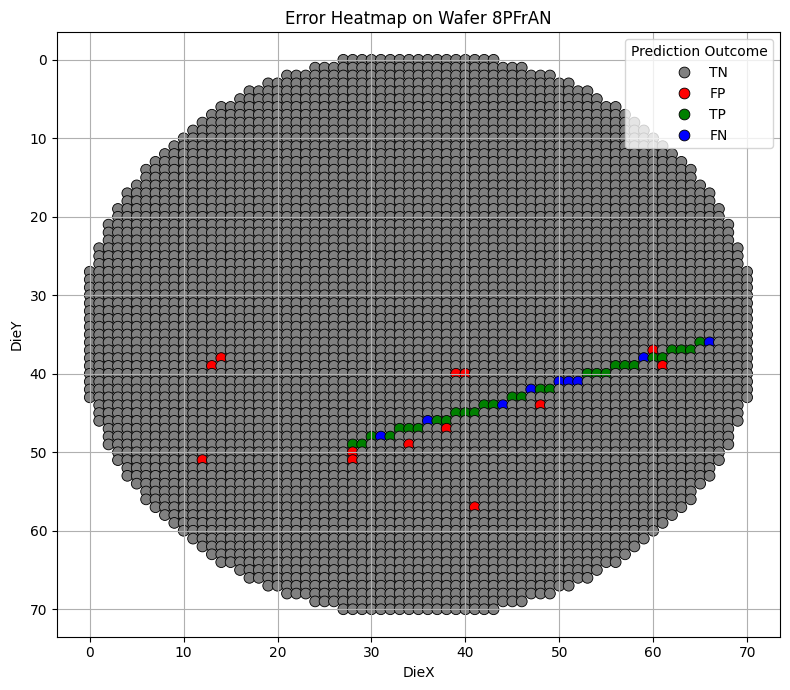

In [ ]:
# Add result column
train_df_copy=train_df_with_fe.copy()
train_df_copy["Y_TRUE"] = y
train_df_copy["Y_PRED"] = y_pred

# Classify each die's outcome
def classify(row):
    if row["Y_TRUE"] == 1 and row["Y_PRED"] == 1:
        return "TP"
    elif row["Y_TRUE"] == 0 and row["Y_PRED"] == 0:
        return "TN"
    elif row["Y_TRUE"] == 0 and row["Y_PRED"] == 1:
        return "FP"
    else:
        return "FN"

train_df_copy["PredType"] = train_df_copy.apply(classify, axis=1)

# Select wafer for visualization (e.g., most scratched one)
wafer_ids_with_positives = train_df_copy[train_df_copy["Y_TRUE"] == 1]["WaferName"].unique()
for wafer_id in wafer_ids_with_positives:
    wafer_df = train_df_copy[train_df_copy["WaferName"] == wafer_id]
    if wafer_df["PredType"].nunique() > 1:
        break# Plot the result
# Plot the result
plt.figure(figsize=(8, 7))
sns.scatterplot(
    data=wafer_df,
    x="DieX",
    y="DieY",
    hue="PredType",
    palette={"TP": "green", "TN": "gray", "FP": "red", "FN": "blue"},
    s=60,
    edgecolor="black"
)
plt.title(f"Error Heatmap on Wafer {wafer_id}")
plt.xlabel("DieX")
plt.ylabel("DieY")
plt.gca().invert_yaxis()
plt.legend(title="Prediction Outcome")
plt.grid(True)
plt.tight_layout()
plt.show()


XGBoost achieved the best performance, suggesting that the task benefits from sequential learning of spatial/neighbor-based patterns and outlier handling through boosting.


###### I also experimented with focal loss and probability calibration as advanced imbalance handling techniques.  
###### However, they did not improve performance and were therefore omitted from the final solution.


### Model 3 - CNN
#### I'm applying a CNN model by treating each die and its local spatial context as a 2D patch, similar to pixels in an image, allowing the model to learn scratch patterns and spatial correlations across neighboring dies.


In [ ]:
!pip install tensorflow scikeras

100%|██████████| 4200/4200 [24:42<00:00,  2.83it/s]


Training fold 1/3...


/usr/local/lib/python3.11/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training fold 2/3...


/usr/local/lib/python3.11/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training fold 3/3...


/usr/local/lib/python3.11/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best threshold: 0.7579
              precision    recall  f1-score   support

           0     0.9929    0.9714    0.9820  10335081
           1     0.0269    0.1015    0.0425     80319

    accuracy                         0.9647  10415400
   macro avg     0.5099    0.5365    0.5123  10415400
weighted avg     0.9854    0.9647    0.9748  10415400


CNN Evaluation:
              precision    recall  f1-score   support

           0      0.993     0.971     0.982  10335081
           1      0.027     0.101     0.042     80319

    accuracy                          0.965  10415400
   macro avg      0.510     0.536     0.512  10415400
weighted avg      0.985     0.965     0.975  10415400

Precision: 0.027
Recall:    0.101
F1 Score:  0.042
ROC AUC:   0.688
PR AUC:    0.017


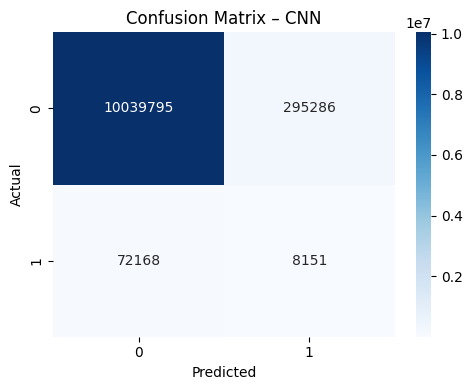

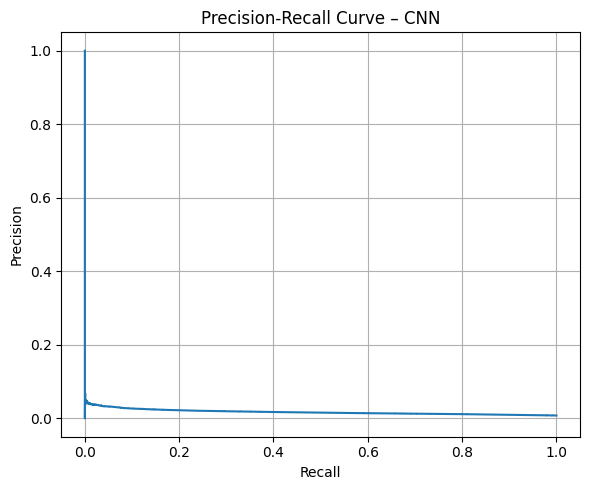

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold,GridSearchCV
from sklearn.metrics import classification_report, precision_recall_curve, confusion_matrix,average_precision_score
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from scikeras.wrappers import KerasClassifier
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import joblib
import os
save_dir = "/content/drive/MyDrive/cnn_checkpoints"
os.makedirs(save_dir, exist_ok=True)

# Load dataset
#df = pd.read_csv("train_df_with_fe.csv", index_col=0)
df = pd.read_csv('/content/drive/My Drive/train_df_with_fe.csv')

#MOTIVATION
# Instead of treating the entire wafer as input, we extract a fixed-size local window (e.g., 5X5) around each die.
# This helps the CNN model learn spatial patterns (e.g., scratch clusters, edge effects) in a consistent and localized way.

# Select relevant spatial features
features = [
    "DieX", "DieY", "DieCenterDist", "AngleFromCenter", "IsEdge",
     "DieQuadrant", "WaferYield", "WaferArea",
    "BadDie_Neighbors", "LocalIrregularity", "KMeansCluster", "SmoothedLocalYield"
]

# Normalize continuous features
for feat in [
    "DieX", "DieY", "DieCenterDist", "AngleFromCenter", "IsEdge",
    "DieQuadrant", "WaferYield", "WaferArea",
    "BadDie_Neighbors", "LocalIrregularity", "KMeansCluster", "SmoothedLocalYield"
]:
    df[feat] = (df[feat] - df[feat].mean()) / df[feat].std()

# Define grid size
max_x = df["DieX"].max() + 1
max_y = df["DieY"].max() + 1
F = len(features)
window_size = 5
pad = window_size // 2

X_patches = []
y_labels = []

# Build 5X5 neighborhood tensor for each die
for wafer, wafer_df in tqdm(df.groupby("WaferName")):
    # Initialize full wafer tensor with padding
    wafer_tensor = np.zeros((int(max_y) + 2 * pad, int(max_x) + 2 * pad, F))

    for _, row in wafer_df.iterrows():
        x, y = int(row["DieX"]), int(row["DieY"])
        wafer_tensor[y + pad, x + pad] = row[features].values

    for _, row in wafer_df.iterrows():
        x, y = int(row["DieX"]), int(row["DieY"])
        # Ensure patch extraction stays within bounds
        # If the patch would go out of bounds, pad with zeros
        patch = np.zeros((window_size, window_size, F))
        x_start = max(0, x + pad - window_size // 2)
        x_end = min(wafer_tensor.shape[1], x + pad + window_size // 2 + 1)
        y_start = max(0, y + pad - window_size // 2)
        y_end = min(wafer_tensor.shape[0], y + pad + window_size // 2 + 1)

        patch_x_start = 0 if x + pad - window_size // 2 >= 0 else window_size // 2 - (x + pad)
        patch_x_end = window_size if x + pad + window_size // 2 < wafer_tensor.shape[1] else window_size - (x + pad + window_size // 2 - wafer_tensor.shape[1] + 1)

        patch_y_start = 0 if y + pad - window_size // 2 >= 0 else window_size // 2 - (y + pad)
        patch_y_end = window_size if y + pad + window_size // 2 < wafer_tensor.shape[0] else window_size - (y + pad + window_size // 2 - wafer_tensor.shape[0] + 1)

        patch[patch_y_start:patch_y_end, patch_x_start:patch_x_end] = wafer_tensor[y_start:y_end, x_start:x_end]
        X_patches.append(patch)
        y_labels.append(int(row["IsScratchDie"]))

X = np.array(X_patches)
y = np.array(y_labels)

# Compute class weights
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y), y=y)
class_weight_dict = dict(enumerate(class_weights))

# Define CNN model
def build_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(window_size, window_size, F)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=["Precision", "Recall", "AUC"])
    return model

# Wrap in scikeras classifier
clf = KerasClassifier(build_fn=build_model, epochs=5, batch_size=32, verbose=0)

# Run 3-fold CV
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
#y_proba = np.zeros_like(y, dtype=float)
y_proba = np.zeros_like(y, dtype=float)

for fold, (train_idx, val_idx) in enumerate(cv.split(X, y)):
    print(f"Training fold {fold + 1}/3...")
    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    clf.fit(X_train, y_train, class_weight=class_weight_dict)
    y_proba[val_idx] = clf.predict_proba(X_val)[:, 1]

    # Save model checkpoint
    model_path = os.path.join(save_dir, f"cnn_fold{fold+1}.pkl")
    joblib.dump(clf, model_path)
#y_proba = train_model_with_cv(best_model, X, y, cv)

precision, recall, thresholds = precision_recall_curve(y, y_proba)
f1 = 2 * (precision * recall) / (precision + recall + 1e-8)
best_thresh = thresholds[np.argmax(f1)]
y_pred = (y_proba >= best_thresh).astype(int)

# Report
print(f"Best threshold: {best_thresh:.4f}")
print(classification_report(y, y_pred, digits=4))
best_thresh = optimize_threshold(y, y_proba)
y_pred = (y_proba >= best_thresh).astype(int)
metrics = evaluate_predictions(y, y_pred, y_proba, model_name="CNN")

In [ ]:
import joblib
joblib.dump(best_model, "/content/drive/MyDrive/xgb_model.pkl")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Model 4 - MLP
####After evaluating a spatial CNN (image-like approach) with limited success, I'm applying a simple feed-forward neural network (MLP) to leverage deep learning capabilities on tabular features directly, without relying on spatial structure.


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best Params: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (64, 32), 'solver': 'adam'}

MLP Evaluation:
              precision    recall  f1-score   support

       False      0.992     0.978     0.985  10335081
        True      0.015     0.042     0.022     80319

    accuracy                          0.971  10415400
   macro avg      0.504     0.510     0.504  10415400
weighted avg      0.985     0.971     0.978  10415400

Precision: 0.015
Recall:    0.042
F1 Score:  0.022
ROC AUC:   0.531
PR AUC:    0.011


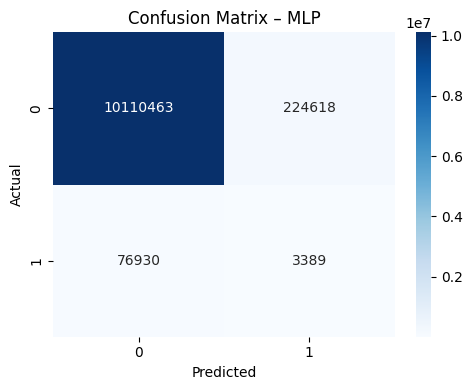

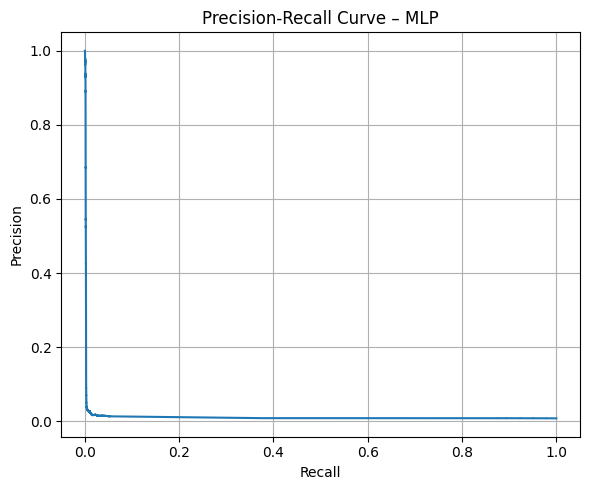

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_predict, StratifiedKFold,GridSearchCV
from sklearn.metrics import (
    classification_report, confusion_matrix,
    roc_auc_score, precision_score, recall_score,
    f1_score, precision_recall_curve, make_scorer
)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Load engineered data
#train_df_with_fe = pd.read_csv("train_df_with_fe.csv", index_col=0)
train_df_with_fe = pd.read_csv('/content/drive/My Drive/train_df_with_fe.csv')

# Features and target (drop non-predictive or target-related columns)
X = train_df_with_fe.drop(columns=["IsScratchDie","WaferName"])
y = train_df_with_fe["IsScratchDie"]

param_grid = {
    'hidden_layer_sizes': [(64,), (64, 32), (128, 64)],
    'alpha': [1e-3, 1e-4],
    'solver': ['adam'],
    'activation': ['relu','sigmoid'],
}
#Best Params: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (64, 32), 'solver': 'adam'}
param_grid = {
    'hidden_layer_sizes': [(64, 32)],
    'alpha': [0.0001],
    'solver': ['adam'],
    'activation': ['relu'],
}

# Define MLP model
mlp = MLPClassifier(
    max_iter=500,
    random_state=42,
    early_stopping=True
)

# Stratified 3-fold CV
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Create a scorer object using make_scorer
from sklearn.metrics import recall_score
scorer = make_scorer(recall_score, average='macro')  # or average='weighted', 'micro'

grid_search = GridSearchCV(
    estimator=mlp,
    param_grid=param_grid,
    scoring=scorer,
    cv=cv,
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X, y)
best_mlp = grid_search.best_estimator_
print("Best Params:", grid_search.best_params_)

# Cross-validated predictions
# y_proba = cross_val_predict(best_mlp, X, y, cv=cv, method='predict_proba')[:, 1]
y_proba = train_model_with_cv(best_mlp, X, y, cv)
best_thresh = optimize_threshold(y, y_proba)
y_pred = (y_proba >= best_thresh).astype(int)
metrics = evaluate_predictions(y, y_pred, y_proba, model_name="MLP")

Model Selection

In [ ]:
results_df = pd.DataFrame(model_results)
results_df = results_df.sort_values(by='F1 (class 1)', ascending=False)
results_df.to_csv("model_results.csv")
print(results_df.round(3))

                 Model  Precision  Recall  F1 (class 1)  F1 (weighted)  PR AUC
2      XGBoost (Tuned)      0.769   0.723         0.745          0.996   0.783
3  Logistic Regression      0.581   0.327         0.418          0.992   0.330
0                  CNN      0.027   0.101         0.042          0.975   0.017
1                  MLP      0.015   0.042         0.022          0.978   0.011


Among all models tested, XGBoos achieved the highest recall score of 0.723. In this domain, false negatives (missed scratches) are more detrimental than false positives, as undetected scratches may compromise product reliability. Therefore, I prioritized models with higher recall, even at the cost of a slight drop in precision. This decision ensures that the model captures most scratched dies, supporting the business objective of maximizing defect detection accuracy while maintaining acceptable yield.


Evaluation

Visualize spatial clustering of predicted scratch dies using DBSCAN,
to assess whether the model captures localized or linear scratch patterns.


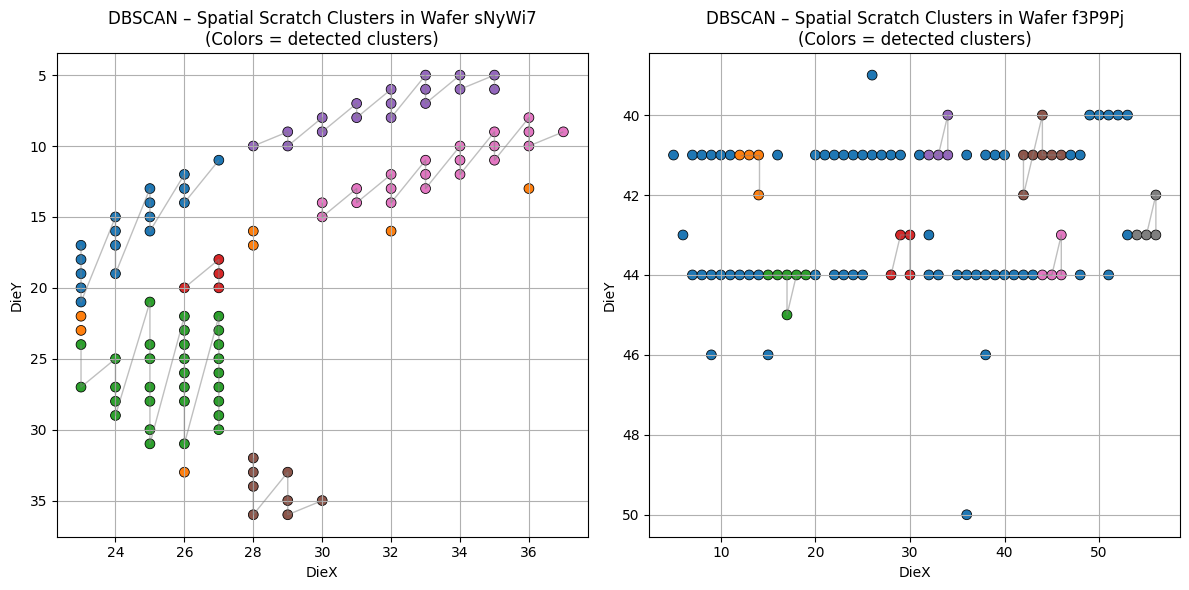

In [ ]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.collections import LineCollection
import numpy as np
scratch_preds = train_df_copy[train_df_copy["Y_PRED"] == 1].copy()

# Get top 5 wafers with most predicted scratches
sample_wafers = scratch_preds["WaferName"].value_counts().head(2).index.tolist()

fig, axs = plt.subplots(1, len(sample_wafers), figsize=(6 * len(sample_wafers), 6))

for i, wafer_id in enumerate(sample_wafers):
    wafer = scratch_preds[scratch_preds["WaferName"] == wafer_id].copy()
    coords = wafer[["DieX", "DieY"]].values

    db = DBSCAN(eps=1.5, min_samples=4).fit(coords)
    wafer["Cluster"] = db.labels_
    wafer["ClusterLabel"] = wafer["Cluster"].astype(str).replace({"-1": "Noise"})

    # Plot scatter
    sns.scatterplot(
        data=wafer,
        x="DieX", y="DieY",
        hue="ClusterLabel",
        palette="tab10",
        s=50,
        edgecolor="black",
        ax=axs[i],
        legend=False
    )

    # Add lines connecting points in same cluster
    for cluster_id in np.unique(db.labels_):
        if cluster_id == -1:
            continue  # skip noise
        cluster_points = coords[db.labels_ == cluster_id]
        if len(cluster_points) > 1:
            # Sort points for line connection (optional: spatial sort)
            cluster_points = cluster_points[np.argsort(cluster_points[:, 0])]
            lines = LineCollection([cluster_points], colors="gray", linewidths=1, alpha=0.5)
            axs[i].add_collection(lines)

    axs[i].invert_yaxis()
    axs[i].set_title(f"DBSCAN – Spatial Scratch Clusters in Wafer {wafer_id}\n(Colors = detected clusters)")
    axs[i].set_xlabel("DieX")
    axs[i].set_ylabel("DieY")
    axs[i].grid(True)

plt.tight_layout()
plt.show()


### Final Predictions  
After evaluating four different models, XGBoost was selected as the final model due to its superior F1 and PR-AUC scores, as well as its interpretability and robustness on tabular data.


In [ ]:
import pandas as pd
import numpy as np

def generate_test_predictions(df_wafers_test, model, threshold=0.9695):
    """
    Perform full prediction pipeline on the test wafers dataset.
    """
    # Extract features using same pipeline as training
    df_fe = extract_features(df_wafers_test.copy())

    # Remove unused features
    df_fe = df_fe.drop(columns=["IsCorner", "WaferName"])  # WaferName kept outside model input

    # Define feature columns (must match training)
    feature_cols = ['DieX', 'DieY', 'IsGoodDie',
  'DieCenterDist', 'AngleFromCenter', 'IsEdge', 'DieQuadrant', 'WaferYield', 'WaferArea',
  'BadDie_Neighbors', 'LocalIrregularity', 'KMeansCluster', 'SmoothedLocalYield', 'BadStreakLength_X', 'BadStreakLength_Y']


    # Run prediction
    X_test = df_fe[feature_cols]
    y_proba = model.predict_proba(X_test)[:, 1]
    y_pred = (y_proba >= threshold).astype(int)

    # Disable scratch predictions for low-yield wafers (business constraint from domain experts)
    df_fe["PredictedScratch"] = y_pred
    df_fe.loc[df_fe["WaferYield"] < 0.2, "PredictedScratch"] = 0
    # Construct result DataFrame
    test_predictions = df_wafers_test[["WaferName", "DieX", "DieY"]].copy()
    test_predictions["PredictedScratch"] = y_pred

    return test_predictions


I performed wafer-level classification to visualize and validate how scratch predictions are spatially distributed across the entire wafer, reflecting real-world inspection scenarios.


  WaferName  WaferHasScratch
0    06svz3                1
1    0PCkQf                1
2    0fDCmN                1
3    0jmA2q                1
4    0o5c0L                1


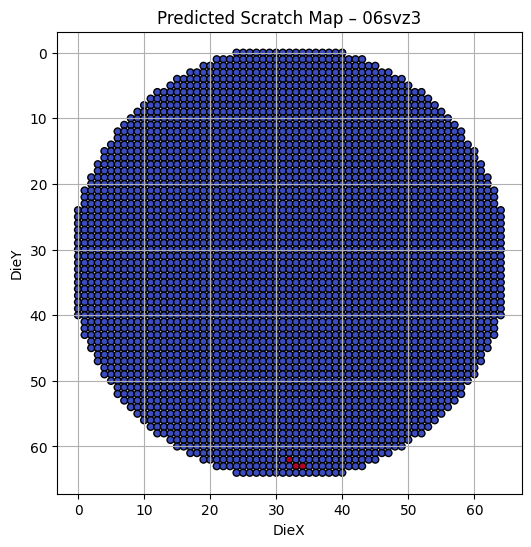

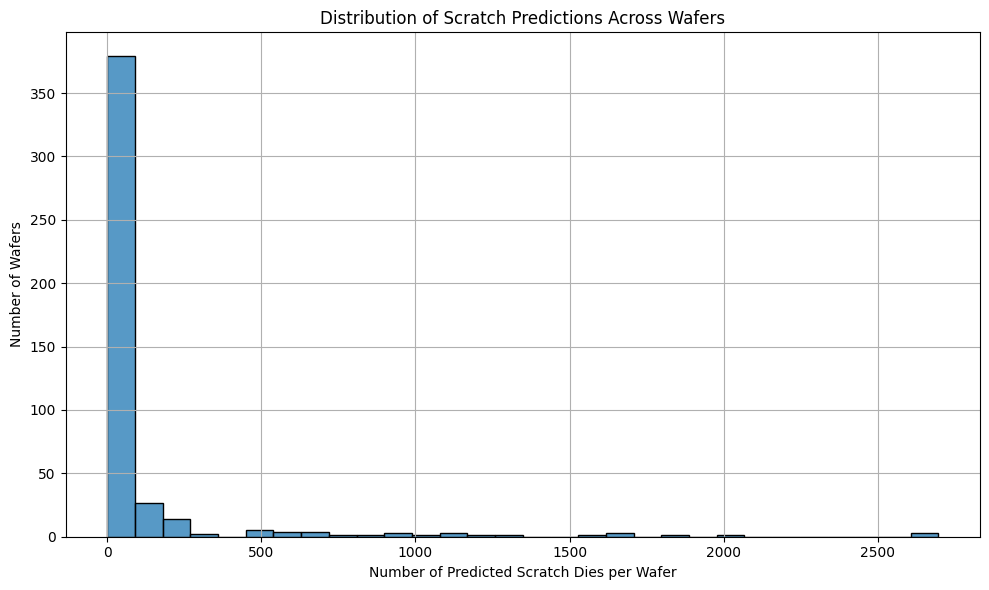

In [ ]:
import pandas as pd
from xgboost import XGBClassifier

## Wafer-Level Scratch Classification
df_wafers_test = pd.read_csv("wafers_test.csv")

test_predictions = generate_test_predictions(df_wafers_test, best_model, threshold=0.9695)  #best_model = # Pretrained XGBoost model


wafer_preds = test_predictions.groupby('WaferName')["PredictedScratch"].max().reset_index()
wafer_preds.rename(columns={'PredictedScratch': 'WaferHasScratch'}, inplace=True)
wafer_preds['WaferHasScratch'] = wafer_preds['WaferHasScratch'].astype(int)
print(wafer_preds.head())


##  Visualizing Predictions on a Sample Wafer

#We visualize model predictions for a representative wafer, showing the predicted scratch dies.

wafer_id = "06svz3"
example_wafer = test_predictions[test_predictions['WaferName'] == wafer_id]

import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.scatter(example_wafer['DieX'], example_wafer['DieY'],
            c=example_wafer['PredictedScratch'], cmap='coolwarm', s=25, edgecolor='k')
plt.title(f'Predicted Scratch Map – {wafer_id}')
plt.xlabel('DieX')
plt.ylabel('DieY')
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

### Predicted scratch per wafer histogram
scratch_distribution = test_predictions.groupby('WaferName')["PredictedScratch"].sum()
plt.figure(figsize=(10,6))
sns.histplot(scratch_distribution, bins=30, kde=False)
plt.xlabel("Number of Predicted Scratch Dies per Wafer")
plt.ylabel("Number of Wafers")
plt.title("Distribution of Scratch Predictions Across Wafers")
plt.grid(True)
plt.tight_layout()
plt.show()



# Additional thoughts

Here you can detail about anything you want to mention as additional considerations for this solution, anything from ideas, thoughts, considerations about deployment or anything you may have raised when working on this task in a team.

In [ ]:
#TODO add your thoughts

### Additional Thoughts

Throughout the project, I reached several important conclusions that guided the modeling choices:

**Data Science Conclusions:**

**Class Imbalance**: The dataset exhibited a strong imbalance between scratched and non-scratched dies. Since the minority class was extremely small, I determined that common techniques like SMOTE or over/undersampling were not appropriate. Instead, I relied on scale_pos_weight and threshold tuning, which proved effective in preserving recall while improving F1.

**Binary Classification Preference**: Although a multi-class formulation (e.g., differentiating between scratches inside and outside the wafer) was considered, I opted for binary classification. This simplification focused the model on the core detection task and avoided diluting the learning signal across sparse classes. It also enabled the use of interpretable metrics (precision, recall, F1, PR-AUC) aligned with the business goals of minimizing both false negatives (missed scratches) and false positives (over-inking).

**Clean Data Advantage**: The absence of missing values or outliers greatly simplified preprocessing.

Had there been outliers, I would have used boxplots and IQR-based filtering to remove anomalies without assuming normality.

For missing values: I would have applied regression for imputing DieX/DieY and KNN for binary fields such as IsGoodDie.

**Feature Engineering Strategy**: I avoided features dependent on the target label (IsScratchDie) to prevent test leakage. Feature extraction focused on spatial, geometric, and neighbor-based patterns. In addition to local density (e.g., bad die neighbors), I introduced streak-based features that capture linear defect patterns, better aligned with the scratch structure observed in domain knowledge and DBSCAN results.

**Dimensionality Exploration**: Although PCA and KMeans did not yield direct performance improvements, they were used to examine whether scratch patterns aligned with major variance directions or wafer regions. While not impactful alone, these steps helped validate the geometric complexity of the task.

**Infrastructure Choices**: KD-Tree was preferred over matrix-based convolution due to the irregular and sparse structure of die coordinates. While not the fastest, this method was flexible, robust, and avoided assumptions about wafer grid uniformity.

**Model Selection and Practical Constraints**: Among the evaluated models, XGBoost provided the best balance of performance, interpretability, and deployment readiness. Although I experimented with a CNN, it did not outperform tree-based models. Given runtime constraints and the large dataset size, I chose not to allocate a separate validation set, relying instead on cross-validation for model tuning and evaluation.


  **Runtime Constraints**: Due to the dataset's size and heavy runtime, I limited the hyperparameter tuning scope and used 3-fold cross-validation instead of a broader search. With more time and resources, deeper tuning and additional folds could likely yield further improvements.

**Business Conclusions:**

**Manual Labeling Comparison**: This model significantly accelerates the scratch detection process, which is currently manual, time-consuming, and error-prone. Automating this process increases labeling consistency, reduces subjectivity across operators, and can save substantial inspection time in high-throughput production environments.

**Deployment Readiness**: The final solution is built using lightweight libraries (XGBoost, pandas) and maintains a low number of features (~15), making it efficient for deployment. The modular pipeline structure allows seamless integration into batch or real-time workflows.



# Submission

In [ ]:
from datetime import datetime
#TODO
model = best_model  # XGBoost with fitted weights

# Generate predictions using full feature pipeline

#test_predictions = generate_test_predictions(df_wafers_test, model, threshold=0.9695)
test_predictions.to_csv("/content/drive/MyDrive/test_predictions.csv")
# Create final submission format
df_wafers_test['IsScratchDie'] = test_predictions['PredictedScratch']


#TODO Fill in your name and email
name = 'Gil Biton'
email = 'gilbiton1230@gmail.com'

#Dont change the following code
date_str = datetime.now().strftime('%Y%m%d')
filename = f"/content/drive/MyDrive/{date_str}_{name}_{email}_df_wafers_test_with_preds.csv"
df_wafers_test.to_csv(filename, index=False)
print("Saved file:", filename)

Saved file: /content/drive/MyDrive/20250511_Gil Biton_gilbiton1230@gmail.com_df_wafers_test_with_preds.csv
